## PROTEA NETWORK ANALYSIS (PART II )


In [1]:
#
#import import_ipynb
#import os
import pandas as pd
import numpy as np
from scipy import stats
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import random
from numpy import random as nprando
from datetime import datetime, date, time, timedelta
from IPython.display import Image, SVG, display
#import cairosvg
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
import scipy.cluster.vq as vq
import numpy.linalg as la
import matplotlib.colors as color
from operator import itemgetter
import math
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from kneed import KneeLocator
import sys
import warnings

######################################################################################### 

##PATHS##
#pth=r'\\researchdata.uct.ac.za\LRES\Qualitative\sna-qlr\anon\\'
#pta=r'\\researchdata.uct.ac.za\LRES\Qualitative\sna-qlr\Protea\\'
pth=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\\'
csm=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\csm\\'
pta=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\Protea\\'
cto=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\SurveyCTO\\'
npth = r"C:\Users\SALDRU1\Dropbox\PC\Desktop\sna-qlr\net\\"


##SETUP##
nprando.seed(111)
random.seed(1234)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 10)})
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth", None)
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=0)
## — — — — — — to get rid of warning messages
warnings.filterwarnings('ignore') 
## — — — — — — — Remove scientific notations and display numbers with 2 decimal points instead — — — — — — — 
pd.options.display.float_format = '{:,.2f}'.format
## — — — — — — — Update default background style of plots — — — — — — — 
#sns.set_style(style=’darkgrid’)


##FUNCTIONS##
def set_vertex_community(G, communities):
    G.vs['community'] = communities
    #print(v.index for v in G.vs)
    for v in G.vs.indices:
        #print(v)
        #Add 1 to save 0 for external edges
        G.vs[v]['community'] = G.vs[v]['community']+1
        

def set_edge_community(G):
    #Find internal edges and add their community to their attributes
    #for es in G.get_edgelist():
    for i, e_s in enumerate(G.get_edgelist()):
        #print(i, e_s)
        #for v,w in G.get_edgelist():
        if G.vs[e_s[0]]['community'] == G.vs[e_s[1]]['community']:
            #Internal edge, mark with community
            G.es[i]['community'] = G.vs[e_s[0]]['community']    
        else:
            #External edge, mark as 0
            G.es[i]['community'] = 0    


def set_vertex_color(i, r_off=1, g_off=1,b_off=1):
    #Assign a color to a vertex

    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)   
    c_rgb = (r,g,b)
    c_hex = color.to_hex(c_rgb)
    return c_hex

def set_edge_color(i, r_off=1, g_off=1,b_off=1):
    #Assign a color to a edge
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)   
    c_rgb = (r,g,b)
    c_hex = color.to_hex(c_rgb)
    return c_hex

def get_color(i, r_off=1, g_off=1,b_off=1):
    #Assign a color to a vertex
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 10) % n) / (n - 1)
    g = low + span * (((i + g_off) * 8) % n) / (n - 1)
    b = low + span * (((i + b_off) * 6) % n) / (n - 1)
    return(r, g, b)

def set_community_style(G, communities, my_layout,):
    nprando.seed(111)
    #Set node and edge communities
    #set_vertex_community(G, communities)
    #set_edge_community(G)
    #set_vertex_size(G)
    #Set community color for internal edges
    external = [e_s for i, e_s in enumerate(G.get_edgelist()) if G.es[i]['community'] == 0]
    external_color = ['silver' for e in external]
    #internal = [e_s for i, e_s in enumerate(G.get_edgelist()) if G.es[i]['community'] > 0]
    #internal_color = ['black' for e in internal]
    node_color = [get_color(G.vs[v]['community']) for v in G.vs.indices]
    #print(node_color)
    edge_color = [('silver' if e_s in external else get_color(G.vs[e_s[0]]['community'])) for e_s in G_igu.get_edgelist()]
    edge_degree = G.degree(mode='all')
    G_ig.vs['degree'] = edge_degree
    edge_size = list(map(lambda x:2*math.sqrt(x) , edge_degree))
    #print(edge_size)
    visual_style = {}
    #visual_style["vertex_size"] = set_v_size(G)
    visual_style["vertex_size"] = 5
    visual_style["vertex_color"] = node_color
    #visual_style["vertex_label"] = G.vs["label"]
    visual_style["vertex_label"] = None 
    #visual_style["vertex_label_size"] = 1
    #visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
    visual_style["bbox"] = (500,500)
    visual_style["margin"] = 10
    visual_style["edge_curved"] = False
    visual_style["edge_color"] = edge_color
    visual_style["edge_size"] = 0.1
    visual_style["edge_arrow_size"] = 0.3
    visual_style["layout"] = my_layout    
    return visual_style


def set_v_size(G):
    v_size=[]
    for i in range(len(G.degree())):
        v_size.append(G.degree()[i]+8)
  
    return(v_size)
        
def set_v_color(G, m_lst, m):

    m_min = np.amin(m_lst)
    m_avg = np.mean(m_lst)
    m_50 = np.percentile(m_lst,50)
    m_75 = np.percentile(m_lst,75)
    m_90 = np.percentile(m_lst,90)
    m_max = np.amax(m_lst)
    
    v_col = []
    for i in range(len(ig.VertexSeq(G))):

        if G.vs[m][i] >= m_90:
            v_col.append('red')

        elif G.vs[m][i] >= m_75 and G.vs[m][i] < m_90:
            v_col.append('orange')

        elif G.vs[m][i] >= m_avg and G.vs[m][i] < m_75:
            v_col.append('white')

        else:
            v_col.append('white')
    return v_col

def set_style(G, my_layout, m_lst, m):
    #out_fig_name = "graph.eps"
    nprando.seed(111)
    visual_style = {}
    # Set bbox and margin
    visual_style["bbox"] = (500,500)
    visual_style["margin"] = 10
    # Set vertex colours
    visual_style["vertex_color"] = set_v_color(G,m_lst, m)
    # Set vertex size
    visual_style["vertex_size"] = list(map(lambda x: x, m_lst))
    visual_style["edge_color"] = 'silver'
    visual_style["edge_size"] = 0.1
    visual_style["edge_arrow_size"] = 0.3
    # Set vertex lable size
    visual_style["vertex_label"] = None 
    # Don't curve the edges
    visual_style["edge_curved"] = False
    # Set the layout
    visual_style["layout"] = my_layout
    return visual_style

def set_style_2(G, my_layout, m_lst, m, c=None, v_col=True, v_siz=True, e_col=True, e_siz=True):
    #out_fig_name = "graph.eps"
    nprando.seed(111)
    visual_style = {}
    # Set bbox and margin
    visual_style["bbox"] = (500,500)
    visual_style["margin"] = 10
    # Set vertex colours
    if v_col==True:
        if c==None:
            visual_style["vertex_color"] = set_v_color(G,m_lst, m)  
            #visual_style["vertex_color"] = [int(i * 255/ max(m_lst)) for i in m_lst]
        else:
            visual_style["vertex_color"] = [get_color(G.vs[v][c]) for v in G.vs.indices]
    # Set vertex size
    if v_siz==True:
        visual_style["vertex_size"] = list(map(lambda x: x, m_lst))
    if e_col==True:
        visual_style["edge_color"] = 'silver'
    if e_siz==True:
        visual_style["edge_size"] = 0.1
    visual_style["edge_arrow_size"] = 0.3
    # Set vertex lable size
    visual_style["vertex_label"] = None 
    # Don't curve the edges
    visual_style["edge_curved"] = False
    # Set the layout
    visual_style["layout"] = my_layout
    return visual_style

def sort_index(lst, rev=True):
    index = range(len(lst))
    s = sorted(index, reverse=rev, key=lambda i: lst[i])
    return s

def _calculate_sf(G):
        """
        Calculating the features of a graph.

        Arg types:
            * **graph** *(NetworkX graph)* - A graph to be embedded.

        Return types:
            * **embedding** *(Numpy array)* - The embedding of a single graph.
        """
        number_of_nodes = G.number_of_nodes()
        L_tilde = nx.normalized_laplacian_matrix(G, nodelist=nx.nodes(G))
        dimensions = L_tilde.ndim # L_tilde.shape
        if number_of_nodes <= dimensions:
            embedding = sp.sparse.linalg.eigsh(L_tilde, k=number_of_nodes-1, which='LM',
                              ncv=10*dimensions, return_eigenvectors=False)

            shape_diff = dimensions - embedding.shape[0] - 1
            embedding = np.pad(embedding, (1, shape_diff), 'constant', constant_values=0)
        else:
            embedding = sp.sparse.linalg.eigsh(L_tilde, k=dimensions, which='LM',
                              ncv=10*dimensions, return_eigenvectors=False)
        return embedding

sns.set()
nprando.seed(111)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 8)})
pd.set_option("display.max_columns",None)

##CANVAS VARIABLES##
e_edge = "snaderived_edgeProtea.csv"
e_node = "snaderived_nodeProtea.csv"

##CTO VARIABLES##


######################################################################################### 
##NODE DATA##
df_node = pd.read_csv(npth + e_node, sep=",", usecols=['id', 'label', 'rumour.node', 'cashopt.node', 'landopt.node', 'inoption.node', 'incommittee.node'], dtype={"id":str}, na_values=np.nan)
df_edge = pd.read_csv(npth + e_edge, sep=",", dtype={"source":str})


#### Data

In [2]:
#
print("\n"  + '\033[1m' + 'Data Description' + '\033[0m')
#LOAD NODE DATA##
print("--------" + "\n" + '\033[1m' +"Data: "+ '\033[0m' + 'Node Attr:' + "\n")
#df_node.info()
print(df_node.info())
#print("\n" + '\033[1m' + 'Nodelist Description:' + '\033[0m' + "\n")
#print(df_node_1.info())
#print("\n" + "--------" + "\n" + '\033[1m' + 'Nodelist Summary Statistics:' + '\033[0m' + "\n")
#print("--------")
#print(df_node_1.describe())
#print(df_node.head(10))
##LOAD EDGE DATA##
print("--------" + "\n" + '\033[1m' +"Data: "+ '\033[0m' + 'Edge List' + "\n")
#print(df_edge.info())
#df_edge = df_edge.rename(columns={"source": "source_", 'target':"target_"})
#print(df_edge['other_leader'].describe()) 
df_edge = df_edge.loc[df_edge["other_leader"]!=1]
#df_edge = df_edge.loc[df_edge['claimant']==1]
df_edge.info()
#print("\n" + '\033[1m' + 'Edgelist Description:' + '\033[0m' + "\n")
#print(df_edge_1.info())
#print("\n" + "--------" + "\n" + '\033[1m' + 'Edgelist Summary Statistics:' + '\033[0m' + "\n")
#print("--------")
#print(df_edge_1['weight'].sum())

# CONVERT TO DIRECTED IGRAPH
print("\n"  + '\033[1m' + 'Igraph' + '\033[0m')
print("--------")
print('\033[1m' + 'Directed Graph' + '\033[0m')
G_ig=ig.Graph.DictList(df_node[['id']].to_dict('records'), df_edge.to_dict('records'), directed=True, vertex_name_attr='id', edge_foreign_keys=('source', 'target'))
G_ig.delete_vertices(G_ig.vs(_degree_eq=0))
#G_ig=ig.Graph.DataFrame(df_edge, directed=True, vertices=df_node, use_vids=False )
#print(ig.summary(G_ig))
print("Nodes: " + str(G_ig.vcount()))
print("Edges: " + str(G_ig.ecount()))
#edge_degree = G_ig.degree(mode='all')
#G_ig.vs['degree'] = edge_degree
#print(ig.summary(G_ig))
#print(G_ig)
##CONVERT TO UNDIRECTED IGRAPH
print('\033[1m' + 'Undirected Graph' + '\033[0m')
G_igu=ig.Graph.DictList(df_node[['id']].to_dict('records'), df_edge.to_dict('records'), directed=False, vertex_name_attr='id', edge_foreign_keys=('source', 'target'))
G_igu.simplify(multiple=True, loops=True, combine_edges=(dict(source='first', target='first', weight=sum)))
G_igu.delete_vertices(G_igu.vs(_degree_eq=0))
print("Nodes: " + str(G_igu.vcount()))
print("Edges: " + str(G_igu.ecount()))
d_lst = G_igu.degree(mode='all')
G_igu.vs['degree'] = d_lst
#remove selfloops
#df_edge.drop(df_edge.loc[df_edge['source']==df_edge['target']].index, inplace=True)
#print(len(df_edge)) #2927 #2044 #20519 #145
#Find Giant Component
#print("--------")
#print('\033[1m' + 'Directed Graph - Connected Components' + '\033[0m')
#print("Components: " + str(len(G_ig.connected_components(mode="weak"))))
#print('\033[1m' + 'Directed Graph - Giant Component' + '\033[0m')
G_ig.is_connected(mode='weak')
#print(len(G_ig.connected_components(mode="weak")))
G_ig_1 = G_ig.connected_components(mode="weak").giant()
G_igu_1 = G_igu.connected_components(mode="weak").giant()
#print(ig.summary(G_ig_1))
#print("Nodes: " + str(G_ig_1.vcount()))
#print("Edges: " + str(G_ig_1.ecount()))

# CONVERT TO NETWORK X

G_nx = G_ig.to_networkx()
G_nxu = G_igu.to_networkx()
nodes = df_node.set_index('id').to_dict('index')
nx.set_node_attributes(G_nxu, nodes)
Gcc = max(nx.connected_components(G_nxu), key=len)
G_nxu_1 = G_nxu.subgraph(Gcc)
#print("Nodes: " + str(G_nxu_1.number_of_nodes()))
#print("Edges: " + str(G_nxu_1.number_of_edges()))

print("------------------------"+ "\n" )


Data Description
--------
Data: Node Attr:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                63 non-null     object 
 1   rumour.node       62 non-null     float64
 2   cashopt.node      27 non-null     float64
 3   landopt.node      27 non-null     float64
 4   inoption.node     62 non-null     float64
 5   incommittee.node  62 non-null     float64
 6   label             54 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.6+ KB
None
--------
Data: Edge List

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   source         201 non-null    object 
 1   target         201 non-null    object 
 2   community      201 non-null    object 
 3   weight         154

#### Method


This section uses pythons iGraph library and NetworkX library to describe the network by applying **vertex partitioning**, **community detection**, and **spectral clustering** methods. 

#### Analysis

------------------------------------------------------------------

#### 1. VERTEX PARTITIONING

##### 1.1. Components

In [3]:

#print("--------")
#print('\033[1m' + 'Directed Graph - Connected Components' + '\033[0m')
#print("Components: " + str(len(G_igu.connected_components())))
G_igu.is_connected()
comps = G_igu.connected_components()
comps_mem = comps.membership
'''
comp_lst =[]
#for i in ap_lst:
for v in G_igu.vs.indices:
        if v in comp_lst_1:
            #print(G_ig.vs[v]['id'])
            #Add 1 to save 0 for external edges
            comp_lst.append(1)
        elif v in comp_lst_2:
            comp_lst.append(2)
#print(len(ap_lst_1))
'''
G_igu.vs['component'] = comps_mem

#print(G_igu.summary())
#for v in G_igu.vs.indices:
#    print(G_igu.vs[v]['component'])
#[get_color(G.vs[v]['m']) for v in G.vs.indices]


--------
Component Network:
Node colour: components (2)


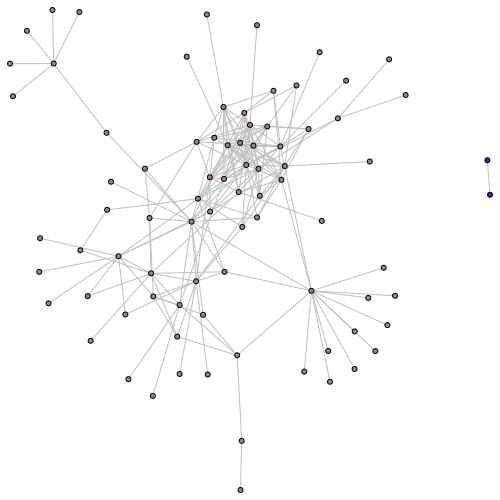

In [4]:
#layout_fruchterman_reingold
#layout_kamada_kawai
# Plot the graph
#colours = ['#fecc5c', '#a31a1c']
color_dict = {1: 'yellow', 2:  'red'}
#plot(g, layout=layout, vertex_color=[color_dict[gender] for gender in g.vs["gender"]])
print("\n" + "--------" + "\n" + '\033[1m' + 'Component Network:' + '\033[0m')
print("Node colour: components (2)")
random.seed(1234)
#ig.plot(G_igu, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', None, True, False), vertex_size = 5)
out = ig.plot(G_igu, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', 'component', True, False), vertex_size = 5)
out.save(pta + "protea_component.png")
Image(filename=pta + "protea_component.png",  width = "600")


##### 1.2. K-Cores


--------
K-Core Network:
Node colour: k-cores (6)


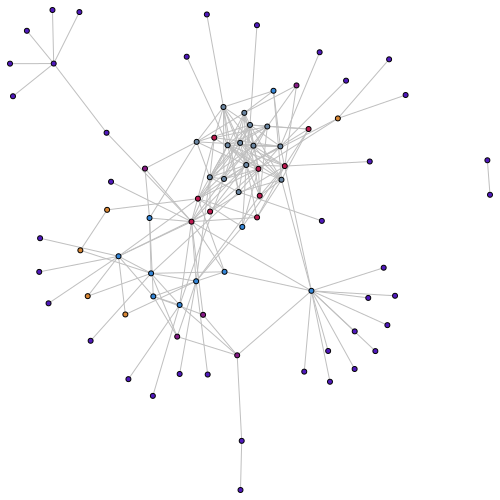

In [5]:
#Coreness
#print("\n" + "--------" + "\n" + '\033[1m' + 'K-Cores:' + '\033[0m')
core_list = G_igu.coreness(mode='all')
G_igu.vs['kcore'] = core_list
#print("K-Cores:", set(core_list))

color_dict = {1: 'white', 2:  'purple', 3: 'blue', 4: 'green', 5: 'yellow', 6: 'red'}
print("\n" + "--------" + "\n" + '\033[1m' + 'K-Core Network:' + '\033[0m')
print("Node colour: k-cores (6)")
random.seed(1234)
out = ig.plot(G_igu, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', 'kcore', True, False), vertex_size = 5)
out.save(pta + "protea_core.png")
Image(filename=pta + "protea_core.png",  width = "600")


##### 1.3. Cliques


--------
Clique Network:
Edge colour: largest cliques (4)


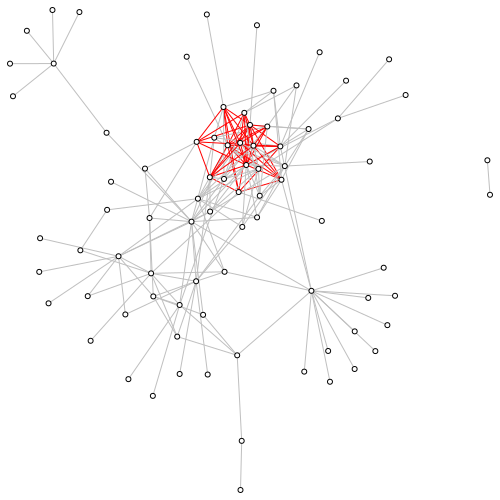

In [6]:
#Clique
#print("\n" + "--------" + "\n" + '\033[1m' + 'Cliques:' + '\033[0m')
cliqs = G_igu.cliques(min=3, max=0)
#print("Number cliques:",len(cliqs))
#print("Largest cliques:", G_igu.clique_number())
max_cliqs = G_igu.largest_cliques()
#print(max_cliqs)
#print("Largest cliques ratio:", len(max_cliqs)/len(cliqs))
#largest cliques of size four make about 6% of total cliques in the network


cliq_set = set([(i,j) for c in max_cliqs for i in c for j in c if i != j])
#print(cliq_set)

#print('----')
#print(G_igu.get_edgelist())

cliq_lst =[]
for i, e_s in enumerate(G_igu.get_edgelist()):
    if e_s in cliq_set:
        G_igu.es[i]['clique'] = 1 
    else:
        #External edge, mark as 0
        G_igu.es[i]['clique'] = 0 
        
external = [e_s for i, e_s in enumerate(G_igu.get_edgelist()) if G_igu.es[i]['clique'] == 0]
internal = [e_s for i, e_s in enumerate(G_igu.get_edgelist()) if G_igu.es[i]['clique'] == 1]
edge_color = [('silver' if e_s in external else 'red') for e_s in G_igu.get_edgelist() ]
print("\n" + "--------" + "\n" + '\033[1m' + 'Clique Network:' + '\033[0m')
print("Edge colour: largest cliques (4)")
random.seed(1234)
out = ig.plot(G_igu, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', 'clique', False, False, False, False), vertex_color="white", vertex_size = 5, edge_color=edge_color, edge_size=0.3)
out.save(pta + "protea_clique.png")
Image(filename=pta + "protea_clique.png",  width = "600")


##### 1.4. Cohesive Blocking


--------
Cohesive Block Network:
Group colour: blocks (9)


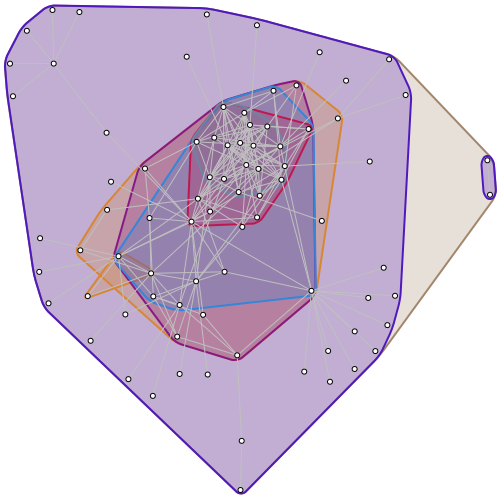

In [7]:
#Cohesive Blocks
#print("\n" + "--------" + "\n" + '\033[1m' + 'Cohesive Blocks:' + '\033[0m')

blocks = G_igu.cohesive_blocks()

blocks_mem = blocks.membership

blocks_coh = blocks.cohesions()

blocks_hrc = blocks.hierarchy()


#G_ig.vs['blocks'] = blocks_mem
#blocks_coh
#print(blocks)
#print(blocks.cohesions())
#print(blocks_hrc)
#print(blocks.parents())

blocks_list = blocks.max_cohesions()
G_igu.vs['blocks'] = blocks_list
grp_lst =[]
for i in range(len(blocks)):
    c = blocks.cohesion(i)
    grp_tup = (blocks[i],get_color(c))
    grp_lst.append(grp_tup)    
#print(grp_lst)
#color_dict = {1: 'white', 2:  'purple', 3: 'blue', 4: 'green', 5: 'yellow', 6: 'red'}
#group_dict = [(blocks[0], 'dark grey'), (blocks[1],'white'), (blocks[2],'white'), (blocks[3],'purple'), (blocks[4],'purple'), (blocks[5],'blue'), (blocks[6],'green'), (blocks[7],'yellow'), (blocks[8],'red')]
print("\n" + "--------" + "\n" + '\033[1m' + 'Cohesive Block Network:' + '\033[0m')
print("Group colour: blocks (9)")
random.seed(1234)
out=ig.plot(blocks, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', 'blocks', False, False), vertex_color='white', vertex_size = 5, mark_groups = grp_lst)
out.save(pta + "protea_block.png")
Image(filename=pta + "protea_block.png",  width = "600")

-----------------------------------------------------
#### 2. COMMUNITY DETECTION

##### 2.1. Optimisation



To choose an optimal resolution parameter (gamma), we estimate the leiden algorithm and explore community outcomes across different values of gamma. Letting the data tell me which points are more optimal than others, we select gamma at the points in the graph where the number of communities detected reach a constant plateau or flatness. 
	


--------
Resolution Optimisation:


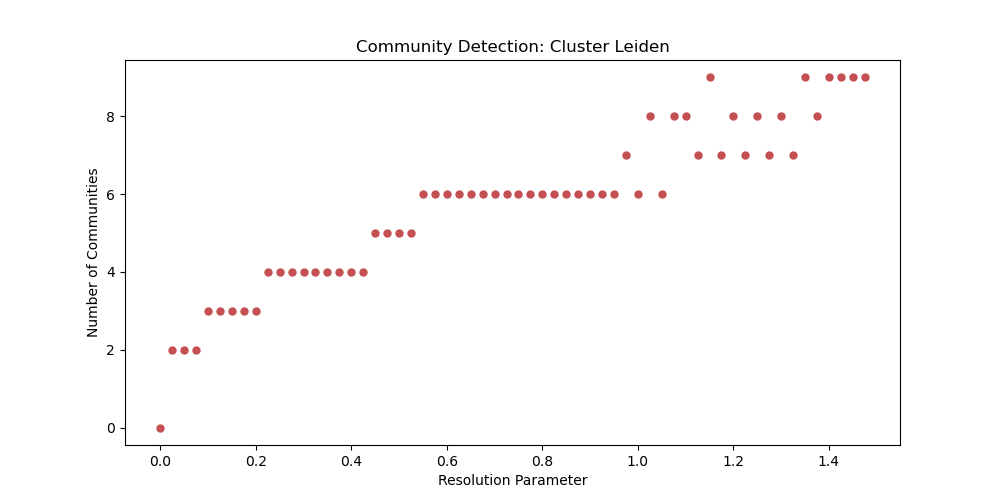

In [8]:
#
#LEIDEN OPTIMAL RESOLUTION PARAMETER
#leiden
nprando.seed(1234)
print("\n" + "--------" + "\n" + '\033[1m' + 'Resolution Optimisation:' + '\033[0m')
'''
plt.rcParams["figure.figsize"]=[10,5]
gamma = np.arange(0.0,1.5,0.025)
gc =[]
nc=[0]*len(gamma)
random.seed(1234)
for i in range(1,len(gamma)):
    leiden_clust = G_igu.community_leiden(objective_function='modularity', n_iterations = 100, resolution_parameter=gamma[i]) #1 #0.6 #0.05 #0.01
    leiden_com = len(leiden_clust)

    nc[i] = leiden_com
    gc.append(gamma[i])

plt.plot(gamma,nc,'ro',markersize=5)
plt.title('Community Detection: Cluster Leiden')
plt.xlabel('Resolution Parameter')
plt.ylabel('Number of Communities')
#plt.savefig(pta + "protea_resolution_ld.png")
#plt.show()
'''
Image(filename=pta + "protea_resolution_ld.png",  width = "600")

##### 2.2. Detection



Setting gamma = 0.6, we detect 6 communities with a modularity of 0.42. The detected communities are visualised below along with descriptions of the top 3 largest communities (by degree).

In [9]:
#
#COMMUNITY SELECTION
nprando.seed(1234)
#print("\n" + '\033[1m' + "Leiden (Optimum)" + '\033[0m')
#print("\n"+"--------"+"\n"+)
gamma=0.6
random.seed(1234)
optimum_clust = G_igu.community_leiden( objective_function='modularity', n_iterations = 100, resolution_parameter=gamma) #1 #0.6 #0.05 #0.01
print("\n"+"--------"+"\n"+'\033[1m' + 'Communinities:' + '\033[0m')
print(len(optimum_clust)) #39 #34
optimum_mem = optimum_clust.membership
optimum_mod = G_igu.modularity(optimum_mem)
print("\n" + '\033[1m' + 'Modularity:' + '\033[0m')
print(optimum_mod) #0.8523986065565808 #0.8441848638707548
#print("\n--------")
#G_ig.vs['optimum_ld'] = optimum_mem


--------
Communinities:
6

Modularity:
0.4173000832986255



--------
Community Network:
Group colour: communities (6)


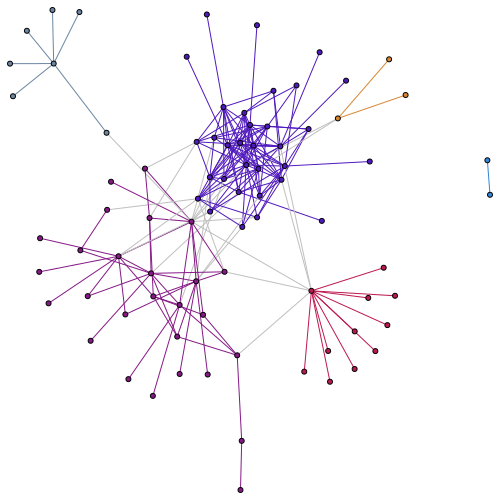

In [10]:
#
#Leiden (Optimal) Plot
set_vertex_community(G_igu, optimum_mem)
G_igu.vs['community_op'] = G_igu.vs['community']
set_edge_community(G_igu)
G_igu.es['community_op'] = G_igu.es['community']
vcolor_lst = [set_vertex_color(G_igu.vs[v]['community_op']) for v in G_igu.vs.indices]
G_igu.vs['hex_op'] = vcolor_lst
ecolor_lst = [set_edge_color(G_igu.es[i]['community_op']) for i, e_s in enumerate(G_igu.get_edgelist())]
G_igu.es['hex_op'] = ecolor_lst

#display(SVG(filename="senekal_comm_op_1_3.svg"))

print("\n" + "--------" + "\n" + '\033[1m' + 'Community Network:' + '\033[0m')
print("Group colour: communities (6)")
random.seed(1234)
out=ig.plot(G_igu, **set_community_style(G_igu, 'community',G_igu.layout_fruchterman_reingold()))
out.save(pta + "protea_community.png")
Image(filename=pta + "protea_community.png",  width = "600")

In [11]:
#print(optimum_clust)

#########################################################################################
siz_c_lst = []
tot_deg_c_lst = []
for i in range(0,len(optimum_clust)):
    op_lst = optimum_clust[i]
    #size
    siz_c = len(op_lst)
    siz_c_lst.append(siz_c)
    #print(siz_c_lst)
    deg_c_lst = []
    for v in op_lst:
        # degree
        deg_c = G_igu.vs[v]['degree']
        deg_c_lst.append(deg_c)
        #print(siz_c_lst)
        #print(den_c_lst)
        #print(deg_c_lst)

    tot_deg_c = np.sum(deg_c_lst)
    tot_deg_c_lst.append(tot_deg_c)
    #print(tot_deg_c_lst)
    max_siz_c = sort_index(siz_c_lst)
    max_deg_c = sort_index(tot_deg_c_lst)
    #print(max_deg_c)
    #print(sort_index(siz_c_lst))
    #print(sort_index(den_c_lst))
    #print(sort_index(deg_c_lst))


print("\n" + "--------" + "\n" + '\033[1m' + "Top 3 Degree Communities: "  +  '\033[0m')
#print("--------------------------------")
for i, c in enumerate(max_deg_c[:3]):
    com_ = c+1
    #com1 = G_ig.vs.select(label="PieterDuToit")["community_op"]
    print("--------------------------------")
    print("\n" + "--------" + "\n" + '\033[1m' + "Community " + str(i+1) + ":" + '\033[0m')
    print("--------")
    #print("Community " + str(i+1))
    #print("--------------------------------")
    print("\n" + '\033[1m' +"Member Size:" + '\033[0m') 
    print(siz_c_lst[c])
    #print("\n" + '\033[1m' +"Member Aggregate Degree:" + '\033[0m')
    #print(int(tot_deg_c_lst[c]))
    print("\n" + '\033[1m' +"Top 3 Member ID*:" + '\033[0m')
    #print([v for v in G_igu.vs.select(community_op=1)])
    for i, v1 in enumerate(sorted(G_igu.vs.select(community_op=com_), key=lambda x:x['degree'], reverse=True)[:3]):
        print(i, v1["id"])

#print("\n" + "--------") 




print("--------------------------------")
print("*Top 3 highest degree in community.")



--------
Top 3 Degree Communities: 
--------------------------------

--------
Community 1:
--------

Member Size:
32

Top 3 Member ID*:
0 609.0
1 605.0
2 601.0
--------------------------------

--------
Community 2:
--------

Member Size:
27

Top 3 Member ID*:
0 627.0
1 618.0
2 645.0
--------------------------------

--------
Community 3:
--------

Member Size:
11

Top 3 Member ID*:
0 654.0
1 659.0
2 671.0
--------------------------------
*Top 3 highest degree in community.


In [12]:
#

G_igu.write_graphml("protea_ld.graphml")

#Vertex attributes
df_vcomm = G_igu.get_vertex_dataframe()
#df_vcomm.info()
#df_vcomm = df_vcomm.loc[:,['id','label','degree','community_op','hex_op']]
df_vcomm.to_csv(pta + "protea_vcomm.csv", sep=";",encoding='utf-8',  index=False)

#Edge attributes
df_ecomm = G_igu.get_edge_dataframe()
#df_ecomm.info()
df_ecomm = df_ecomm.iloc[:,2:9]
#df_ecomm.info()
#print(df_ecomm.head(10))
#df_ecomm.set_index(['source', 'target'], inplace=True)
df_ecomm.to_csv(pta + "protea_ecomm.csv", sep=";",encoding='utf-8',  index=False)



##### 2.3. Evaluation


Using various pair counting scores, we compare community outcomes from the leiden procedure to the greedy optimization and louvain method. 


In [13]:
# Greedy Method
nprando.seed(1234)
#print("\n" + '\033[1m' + "Stats" + '\033[0m')
print("\n" + "--------" + "\n" + '\033[1m' + 'Greedy optimization:' + '\033[0m')
greedy_dendo = G_igu.community_fastgreedy()
print('\033[1m' + 'Communinities:' + '\033[0m')
print(greedy_dendo.optimal_count) #44 #41 #81 #11
#ig.plot(greedy_dendo,"{}".format(gpath) + x + "_greedy_dendo_1.png")
greedy_clust = greedy_dendo.as_clustering()
#print(greedy_clust.summary)
greedy_mem = greedy_clust.membership
#print(greedy_mem)
greedy_mod = G_igu.modularity(greedy_mem)
print("\n" + '\033[1m' + 'Modularity:' + '\033[0m')
print(greedy_mod) #0.8472990106484172 #0.8405184599235168 #0.4536255223753904 #0.6824973985431843
print("\n--------")

#G_ig.vs['community_gd'] = greedy_mem



--------
Greedy optimization:
Communinities:
6

Modularity:
0.4108184089962516

--------


In [14]:
df_vcomm['community_gd']=greedy_mem
df_legd = pd.crosstab(index=df_vcomm['community_op'], columns=df_vcomm['community_gd'])
#print(df_legd)

In [15]:
# Leiden - Greedy
legd_vi = optimum_clust.compare_to(greedy_clust, method='nvi', remove_none=False)
legd_adjr = optimum_clust.compare_to(greedy_clust, method='adjusted_rand', remove_none=False)
legd_nmi = optimum_clust.compare_to(greedy_clust, method='nmi', remove_none=False)
print("\n" + '\033[1m' + "Comparison Scores:" + '\033[0m')
print("--------" + "\n")
print('\033[1m' + 'Variation of Information:' + '\033[0m')
print(legd_vi)
print("\n" + '\033[1m' + 'Adjusted Rand:' + '\033[0m')
print(legd_adjr)
print("\n" + '\033[1m' + 'Normalized Mutual Information:' + '\033[0m')
print(legd_nmi)
print("--------------------------------")


Comparison Scores:
--------

Variation of Information:
0.8581915413586187

Adjusted Rand:
0.8356597230284087

Normalized Mutual Information:
0.8581915413586187
--------------------------------


In [16]:
#Louvain Method
nprando.seed(1234)
print("\n" + "--------" + "\n" + '\033[1m' + 'Louvain Method:' + '\033[0m')
ig_louvain_clust = G_igu.community_multilevel()
#print("\n" + '\033[1m' + "Stats" + '\033[0m')
print("--------\n")
print('\033[1m' + 'Communinities:' + '\033[0m')
print(len(ig_louvain_clust)) #42 #38 #39 #10
#ig_louvain_hist = ig_louvain_clust.size_histogram
#ig.plot(ig_louvain_hist,"{}".format(gpath) + x + "_louvain_hist_1.png")
ig_louvain_mem = ig_louvain_clust.membership
ig_louvain_mod = G_igu.modularity(ig_louvain_mem)
print("\n" + '\033[1m' + 'Modularity:' + '\033[0m')
print(ig_louvain_mod) #0.8511943740418598 #0.8428720537220518 #0.4548224731375923 #0.6868678459937566
print("\n--------")
#G_ig.vs['community_ln'] = ig_louvain_mem


--------
Louvain Method:
--------

Communinities:
8

Modularity:
0.3968919200333194

--------


In [17]:
df_vcomm['community_lo']=ig_louvain_mem
df_lelo = pd.crosstab(index=df_vcomm['community_op'], columns=df_vcomm['community_lo'])
#print(df_lelo)

In [18]:
# Leiden - Louvain
lelo_vi = optimum_clust.compare_to(ig_louvain_clust, method='nvi', remove_none=False)
lelo_adjr = optimum_clust.compare_to(ig_louvain_clust, method='adjusted_rand', remove_none=False)
lelo_nmi = optimum_clust.compare_to(ig_louvain_clust, method='nmi', remove_none=False)
print("\n" + '\033[1m' + "Comparison Scores:" + '\033[0m')
print("--------" + "\n")
print('\033[1m' + 'Variation of Information:' + '\033[0m')
print(lelo_vi)
print("\n" + '\033[1m' + 'Adjusted Rand:' + '\033[0m')
print(lelo_adjr)
print("\n" + '\033[1m' + 'Normalized Mutual Information:' + '\033[0m')
print(lelo_nmi)
print("--------------------------------")


Comparison Scores:
--------

Variation of Information:
0.7924732961242487

Adjusted Rand:
0.6013443027445989

Normalized Mutual Information:
0.7924732961242487
--------------------------------


---------------------------------------------------
#### 3. SPECTRAL CLUSTERING


##### 3.1 Pre-processing

As a first step, we restrict our network to those nodes that form part of the largest (giant) connected component and construct a Laplacian Matrix of the graph.

In [19]:
#LOAD DATA
df_edge = df_edge.loc[df_edge['claimant']==1]
G = nx.from_pandas_edgelist(df_edge, source='source', target='target', edge_attr=True, create_using=nx.Graph())
nodes = df_node.set_index('id').to_dict('index')
nx.set_node_attributes(G, nodes)
Gcc_2 = max(nx.connected_components(G), key=len)
G0 = G.subgraph(Gcc_2)
#print(nx.info(G0))
#print(G0.nodes.data())
print(" — — — — — — — — — -ADJACENCY MATRIX — — — — — — — — — — — -")
A=nx.adjacency_matrix(G0, weight=None)
print(A.todense())
#W=nx.to_pandas_adjacency(G0, weight=None)
#print(W)
print("-"*50)
print(" — — — — — — — — — -DIAGONAL MATRIX = DEGREE OF EACH NODE — — — — — — — — — — — -")
print(G.degree)
#D = np.diag(np.ravel(np.sum(A,axis=1)))
D = np.diag(np.sum(np.array(A.todense()), axis=1))
#print(D.todense()
print("-"*50)
print(" — — — — — — — — — -LAPLACIAN MATRIX — — — — — — — — — — — -")
L0 = D - A
#print(L)
L1 = nx.laplacian_matrix(G0).astype(float)
print(L1.todense())

 — — — — — — — — — -ADJACENCY MATRIX — — — — — — — — — — — -
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
--------------------------------------------------
 — — — — — — — — — -DIAGONAL MATRIX = DEGREE OF EACH NODE — — — — — — — — — — — -
[('618.0', 10), ('612.0', 7), ('615.0', 5), ('623.0', 5), ('624.0', 2), ('627.0', 16), ('628.0', 4), ('645.0', 9), ('648.0', 11), ('650.0', 6), ('653.0', 1), ('673.0', 3), ('681.0', 5), ('607.0', 8), ('633.0', 3), ('642.0', 5), ('601.0', 13), ('602.0', 8), ('604.0', 6), ('605.0', 16), ('606.0', 9), ('608.0', 11), ('609.0', 19), ('610.0', 10), ('616.0', 6), ('641.0', 10), ('614.0', 5), ('626.0', 11), ('631.0', 2), ('630.0', 2), ('636.0', 1), ('643.0', 10), ('603.0', 4), ('646.0', 1), ('670.0', 10), ('611.0', 5), ('613.0', 3), ('617.0', 2), ('632.0', 2), ('658.0', 1), ('622.0', 2), ('657.0', 10), ('625.0', 1), ('647.0', 1), ('649.0', 1), ('620.0', 11), ('640.0', 1), ('663.0', 3),

##### 3.2 Decomposition

Since we only have 1 component, 1 eigenvalue will be equal to 0. However, we can detect the second smallest eigenvalue to figure out which node should be placed in which cluster. The figures below plot the eigenvalues and eigenvectors that correspond to the smallest eigenvalues. 

In [20]:
#
'''
k = 3
w,v = sp.sparse.linalg.eigsh(L1, k,  which='SM')
print('eigenvalues: ', w)
print('eigenvectors: ', v)
v_1 = np.array(v, dtype=np.float)
w_1 = np.array(w, dtype=np.float)
#print(w_1)

'''

#for i in range(1):
np.set_printoptions(threshold=0)
e, x = np.linalg.eig(L0)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(x)

e_1 = e.real
x_1 = x.real
#print(v_1)


eigenvalues:
[20.4871175 +0.00000000e+00j 17.88333094+0.00000000e+00j
 17.23473831+0.00000000e+00j ...  1.        -3.44948824e-16j
  1.        +0.00000000e+00j  1.        +0.00000000e+00j]
eigenvectors:
[[-4.60089800e-02+0.00000000e+00j  8.86839014e-02+0.00000000e+00j
  -2.22817687e-02+0.00000000e+00j ... -1.77355267e-16-5.43586088e-17j
   9.82180992e-17+0.00000000e+00j -1.16036471e-18+0.00000000e+00j]
 [ 4.94295043e-02+0.00000000e+00j  8.27613846e-02+0.00000000e+00j
   2.34548907e-02+0.00000000e+00j ... -2.90106716e-16+2.70872870e-17j
   3.32510851e-16+0.00000000e+00j  2.05105748e-16+0.00000000e+00j]
 [ 5.34326550e-02+0.00000000e+00j  4.30693910e-02+0.00000000e+00j
  -8.19488459e-03+0.00000000e+00j ... -3.16734718e-16+4.71812189e-17j
   3.12046761e-16+0.00000000e+00j  9.69141932e-17+0.00000000e+00j]
 ...
 [ 2.26067958e-03+0.00000000e+00j -6.94524886e-03+0.00000000e+00j
  -6.03026354e-05+0.00000000e+00j ...  1.80690560e-02+2.57353122e-01j
   1.08341865e-01+0.00000000e+00j  1.78486928e-

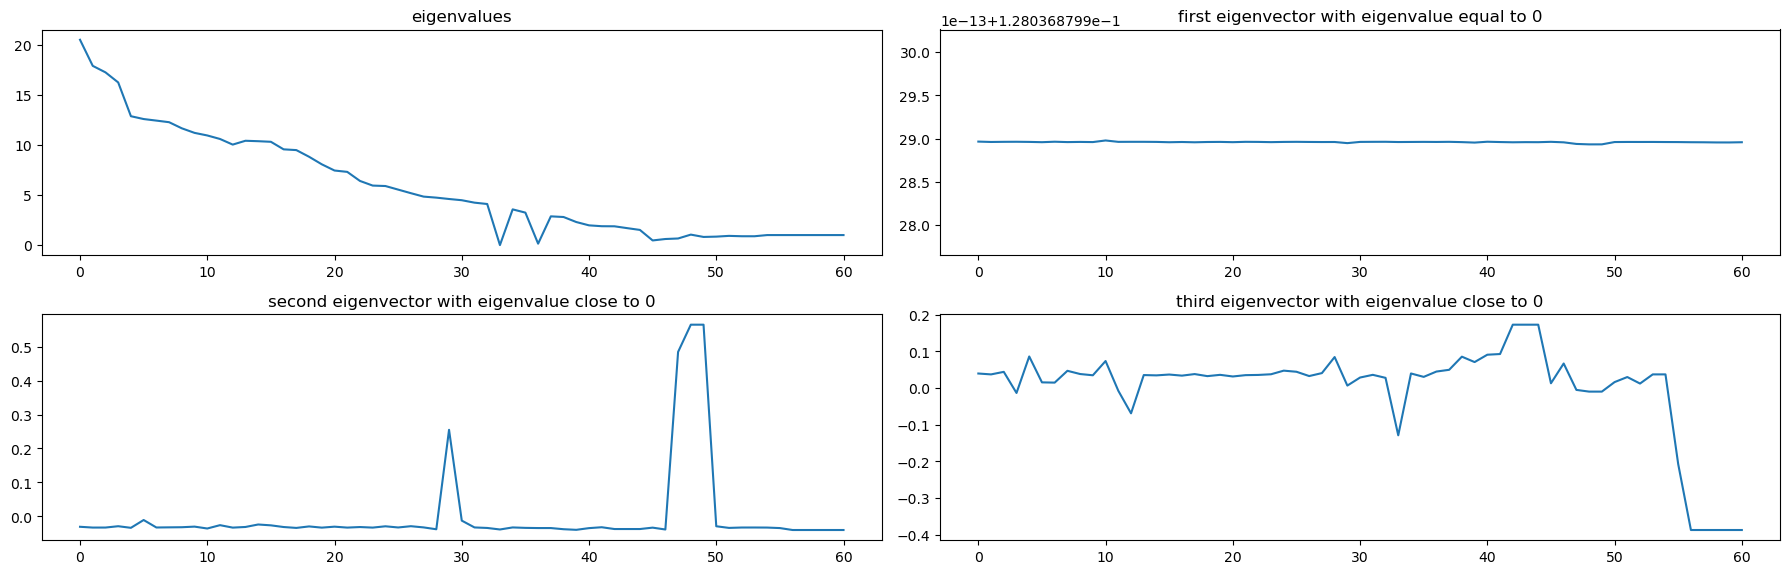

In [21]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(222)
plt.plot(x[:, i[0]])
ax2.title.set_text('first eigenvector with eigenvalue equal to 0')
ax3 = plt.subplot(223)
plt.plot(x[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(x[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

##### 3.3 K-Means

Now, we can use k-means to classify the nodes based off their corresponding values in the eigenvector. However, first we have to detect the optimal number of clusters to fit the graph. The elbow plot below finds K=3 optimal. 


--------
Elbow Method:


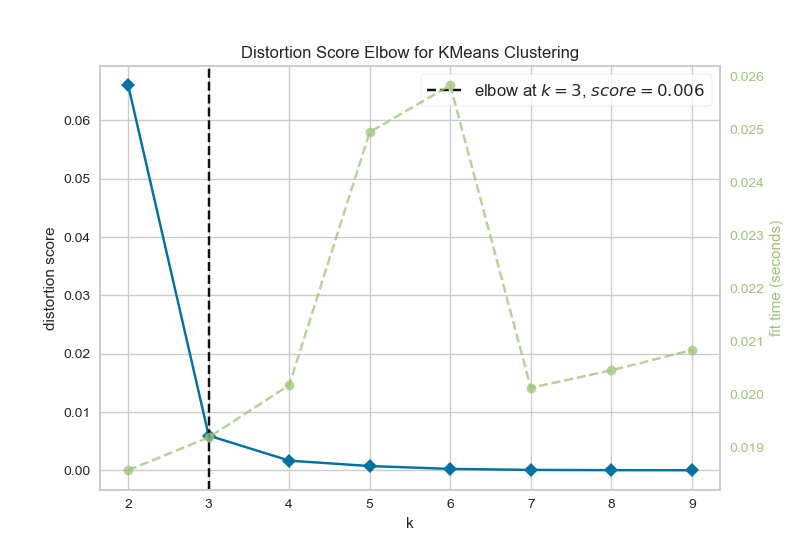

In [22]:
print("\n"+"--------"+"\n"+'\033[1m' + 'Elbow Method:' + '\033[0m')
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer
U = np.array(x_1[:, i[1]])

'''
# Instantiate the clustering model and visualizer
km = KMeans(init='k-means++')
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(U)        # Fit the data to the visualizer
visualizer.show(outpath=pta + "protea_elbow.png")        # Finalize and r
'''
Image(filename=pta + "protea_elbow.png",  width = "600")


Using the silhouette plot approach, we compare plots at various k-clusters. Though we observe wide variation in the sizes of the clusters detected, we find highest silhouette score is achieved at k=2.

In [23]:

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer

#
#SILHOUETTE METHOD
#The silhouette coefficient is a measure of cluster cohesion and separation. 
#It quantifies how well a data point fits into its assigned cluster based on two factors:
#1.How close the data point is to other points in the cluster
#2.How far away the data point is from points in other clusters
#Silhouette coefficient values range between -1 and 1. 
#Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

# Notice you start at 2 clusters for silhouette coefficient
#fig, ax = plt.subplots(2, 2, figsize=(15,12))

'''
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    #Create KMeans instances for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(U) 
'''

k_clust= range(2,6)
'''
for k in k_clust:
    plt.rcParams["figure.figsize"]=[10,5]
    random.seed(1234)
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(U) 
    visualizer.show(outpath=pta + "protea_silhouette_x" + str(k) + ".png")
    plt.clf()
'''
#Image(filename=pta + "protea_silhouette_1.png",  width = "600")

print()


--------
Silhouette Method:

--------
Silhouette score:
K=2:0.9625231065514278
K=3:0.9559997593480192
K=4:0.9495920445099714
K=5:0.7858470084706481


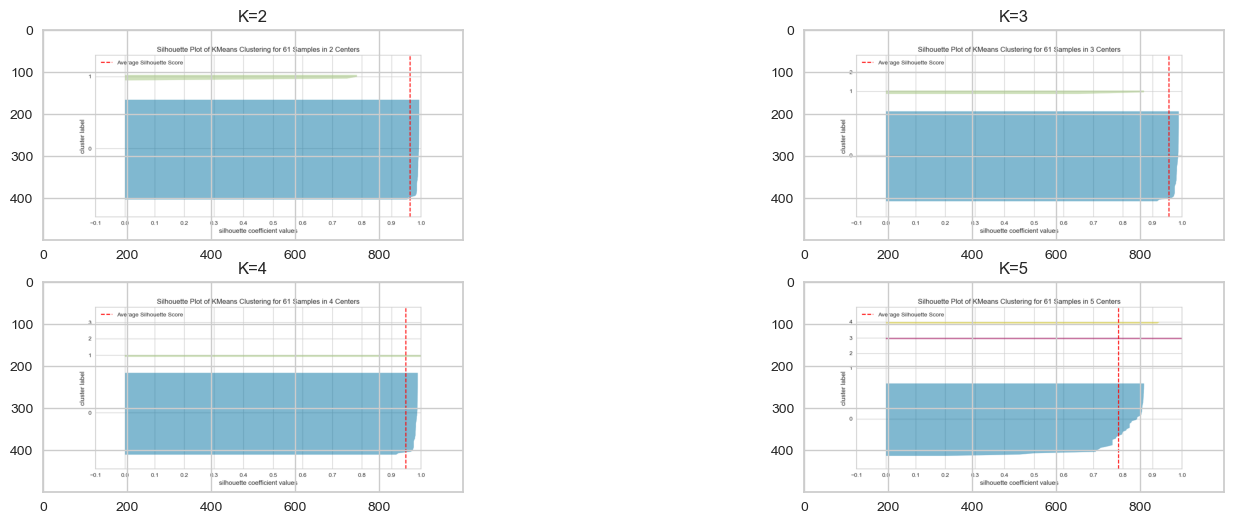

In [24]:
##
print("\n"+"--------"+"\n"+'\033[1m' + 'Silhouette Method:' + '\033[0m')

scr_lst=[]
k_lst=[]
for k in k_clust:
    random.seed(1234)
    km = KMeans(init='k-means++', n_clusters=k ,n_init=10)
    #km.fit(U)
    #km.labels_
    km.fit_predict(U)
    centroids = km.cluster_centers_
    labels = km.labels_
    error = km.inertia_
    scr= silhouette_score(U, labels, metric='euclidean')
    scr_lst.append(scr)
    k_lst.append(k)

                  
# Plot silhouette plots
import glob
import ipyplot
import matplotlib.image as mpimg
m_png = glob.glob(pta + 'protea_silhouette_x*.png')
m_svg = glob.glob('*.svg')
m_png = sorted(m_png, key=lambda x: x)
lbl_array = ["K=" + str(k) for k in k_clust]

fig = plt.figure(figsize=[18, 6])
for i,p in enumerate(m_png):
    img = mpimg.imread(p)
    plt.figure(1)
    plt.subplot(220+i+1)
    plt.title(lbl_array[i])
    plt.imshow(img)

#plt.subplot(212)
#plt.imshow(img2)
#plt.show()


#img_array=['0_putsafirst_temp_sep20_1.svg', '1_putsafirst_temp_oct20_1.svg','2_putsafirst_temp_nov20_1.svg','3_putsafirst_temp_dec20_1.svg','4_putsafirst_temp_jan21_1.svg','5_putsafirst_temp_feb21_1.svg','6_putsafirst_temp_mar21_1.svg','7_putsafirst_temp_apr21_1.svg', '8_putsafirst_temp_may21_1.svg']
lbl_array = ["K=" + str(k) for k in k_clust]
#ipyplot.plot_images(m_png, lbl_array, max_images=4, img_width=500, show_url=False)

print("\n"+"--------"+"\n"+'\033[1m' + 'Silhouette score:' + '\033[0m')
print('K=' + str(k_lst[0]) +':'+  str(scr_lst[0]))
print('K=' + str(k_lst[1]) +':'+  str(scr_lst[1]))
print('K=' + str(k_lst[2]) +':'+  str(scr_lst[2]))
print('K=' + str(k_lst[3]) +':'+ str(scr_lst[3]))


Below we plot optimal clusters K=2 and K=3 detected using the spectral clustering technique. 


--------
Cluster Network :


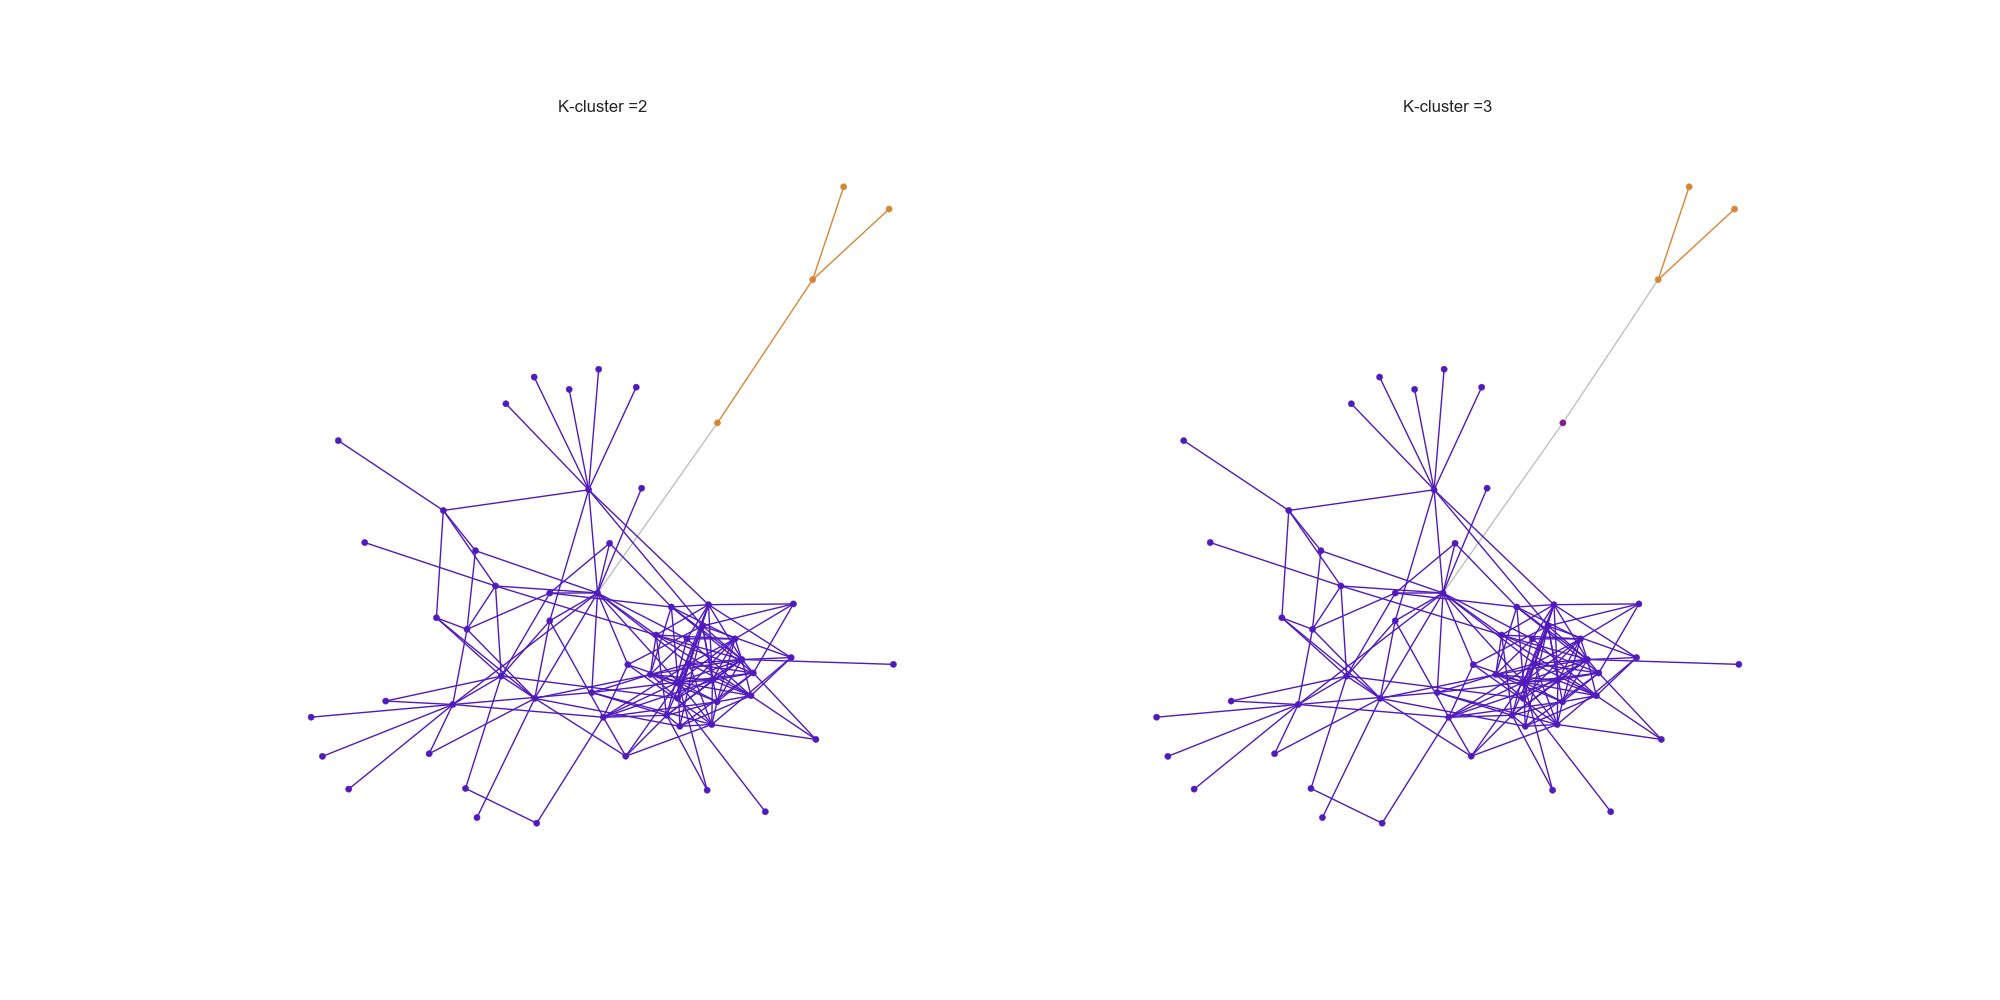

<Figure size 2000x1000 with 0 Axes>

In [25]:
#K-Means
optim=[2,3]
print("\n" + "--------" + "\n" + '\033[1m' + 'Cluster Network :' + '\033[0m')
##PLOTTING GRAPH##
def set_nxnode_community(G, communities, k):
    sc = []
    sc_dict = {}
    #Add community to node attributes
    for i,v in enumerate(G.nodes()):
        #print(v,i, communities[i]+1 )
        sc_dict[v] = communities[i]+1
    #print(sc_dict)
    nx.set_node_attributes(G, sc_dict, name='community_sc' + k)
    #print(G.nodes['618.0']['community'])
    

def set_nxedge_community(G, k):
    #Find internal edges and add their community to their attributes
    for v,w, in G.edges:        
        if G.nodes[v]['community_sc' + k] == G.nodes[w]['community_sc' + k]:
            #Internal edge, mark with community
            G.edges[v,w]['community_sc' + k] = G.nodes[v]['community_sc' + k]
        else:
            #External edge, mark as 0
            G.edges[v,w]['community_sc' + k] = 0


def set_nxnode_color(G, color, k):
    sc_dict = {}
    #Add community to node attributes
    for i,v in enumerate(G.nodes()):
        #print(v,i, communities[i]+1 )
        sc_dict[v] = color[i]
    #print(sc_dict)
    nx.set_node_attributes(G, sc_dict, name='hex_sc' + k)
    #print(G.nodes['618.0']['community'])

    
def set_nxedge_color(G, color, k):
    sc_dict = {}
    #Add community to node attributes
    for i,(v,w) in enumerate(G.edges()):
        #print(v,i, communities[i]+1 )
        sc_dict[(v,w)] = color[i]
    #print(sc_dict)
    nx.set_edge_attributes(G, sc_dict, name='hex_sc' + k)
    #print(G.nodes['618.0']['community'])


coord = nx.spring_layout(G0, k=0.1,weight=None, iterations=1000)
fig = plt.figure(figsize=[20, 10])

# K=3
for i,k in enumerate(optim):
    random.seed(1234)
    km = KMeans(init='k-means++', n_clusters=k ,n_init=10)
    #km.fit(U)
    #km.labels_
    km.fit_predict(U)
    centroids = km.cluster_centers_
    labels = km.labels_
    error = km.inertia_
    #node_colors = [ colors[labels[i]] for i,v in enumerate(G0.nodes())]
    
    #Set node and edge communities
    set_nxnode_community(G0, labels, str(k))
    #G0.nodes['community_sc'] = G0.nodes['community']
    set_nxedge_community(G0, str(k))
    #G0.edges['community_sc'] = G0.edges['community']
    vcolor_lst = [set_vertex_color(G0.nodes[v]['community_sc' + str(k)]) for v in G0.nodes]
    set_nxnode_color(G0, vcolor_lst, str(k))
    ecolor_lst = [set_edge_color(G0.edges[v,w]['community_sc' + str(k)]) for v,w in G0.edges]
    set_nxedge_color(G0, ecolor_lst, str(k))
    #G0.edges['hex_sc'] = ecolor_lst
    
    #Set community color for internal edges
    external = [(v,w) for v,w in G0.edges if G0.edges[v,w]['community_sc'+ str(k)] == 0]
    external_color = ['silver' for e in external]
    node_color = [get_color(G0.nodes[v]['community_sc'+ str(k)]) for v in G0.nodes]
    edge_color = [('silver' if (v,w) in external else get_color(G0.edges[v,w]['community_sc' + str(k)])) for v,w in G0.edges]
    
    '''
    ax = plt.subplot(120+i+1)
    plt.axis('off')
    
    random.seed(1234)
    nx.draw_networkx_nodes(G0, coord, node_size=20, node_color=node_color)
    random.seed(1234)
    nx.draw_networkx_edges(G0, coord, alpha=1, edge_color=edge_color, width=1)
    
    title= 'K-cluster =' + str(k)
    ax.title.set_text(title)
plt.savefig(pta + "protea_spectral.png")
plt.show()
'''
    
Image(filename=pta + "protea_spectral.png",  width = "600")

## Alternative procedure
#_calculate_sf(G0)
#print("ARPACK error 3: No shifts could be applied during a cycle of the Implicitly restarted Arnoldi iteration. One possibility is to increase the size of NCV relative to NEV.")
#print("Warning: Matrix is not positive definite")

#### 4. RESTITUTION PARTICIPATION

In [26]:
node_dict = df_node.set_index('id').to_dict('index')
#print([(i, node_dict[i]['cashopt.node']) for i in node_dict.keys() if node_dict[i]['cashopt.node']==0])

lbl_lst = []
csh_lst = []
rmr_lst = []
opt_lst = []
cmt_lst = []

key_lst=[str(k) for k in node_dict.keys()]
#print(key_lst)
for v in G_igu.vs.indices:
    #print(v)
    i = G_igu.vs[v]['id']
    #print(i)
    if str(i) in key_lst:
        #print(i)
        #print(node_dict[i]['cashopt.node'])
        #print(node_dict[k]['label'])
        lbl_lst.append(node_dict[i]['label'])
        csh_lst.append(node_dict[i]['cashopt.node'])
        rmr_lst.append(node_dict[i]['rumour.node'])
        opt_lst.append(node_dict[i]['inoption.node'])
        cmt_lst.append(node_dict[i]['incommittee.node'])
    else:
        lbl_lst.append(np.nan)
        csh_lst.append(np.nan)
        rmr_lst.append(np.nan)
        opt_lst.append(np.nan)
        cmt_lst.append(np.nan)

#csh_lst = list(map(lambda x:x.replace(nan, np.nan), csh_lst))
#print({col for col in df_sna['cash'].unique()})
#print(set(rmr_lst))
#print(csh_lst) 
csh_lst_1 = [(np.nan if np.isnan(i) else i) for i in csh_lst]
#print(set(csh_lst_1))
#print(lnd_lst) 
#lnd_lst_1 = [(np.nan if np.isnan(i) else i) for i in lnd_lst]
#print(set(lnd_lst_1))
G_igu.vs['label'] = lbl_lst
G_igu.vs['cash'] = csh_lst_1
G_igu.vs['rumour'] = rmr_lst
G_igu.vs['voting'] = opt_lst
G_igu.vs['committee'] = cmt_lst



--------
Participation Network:
Group colour: communities (6)


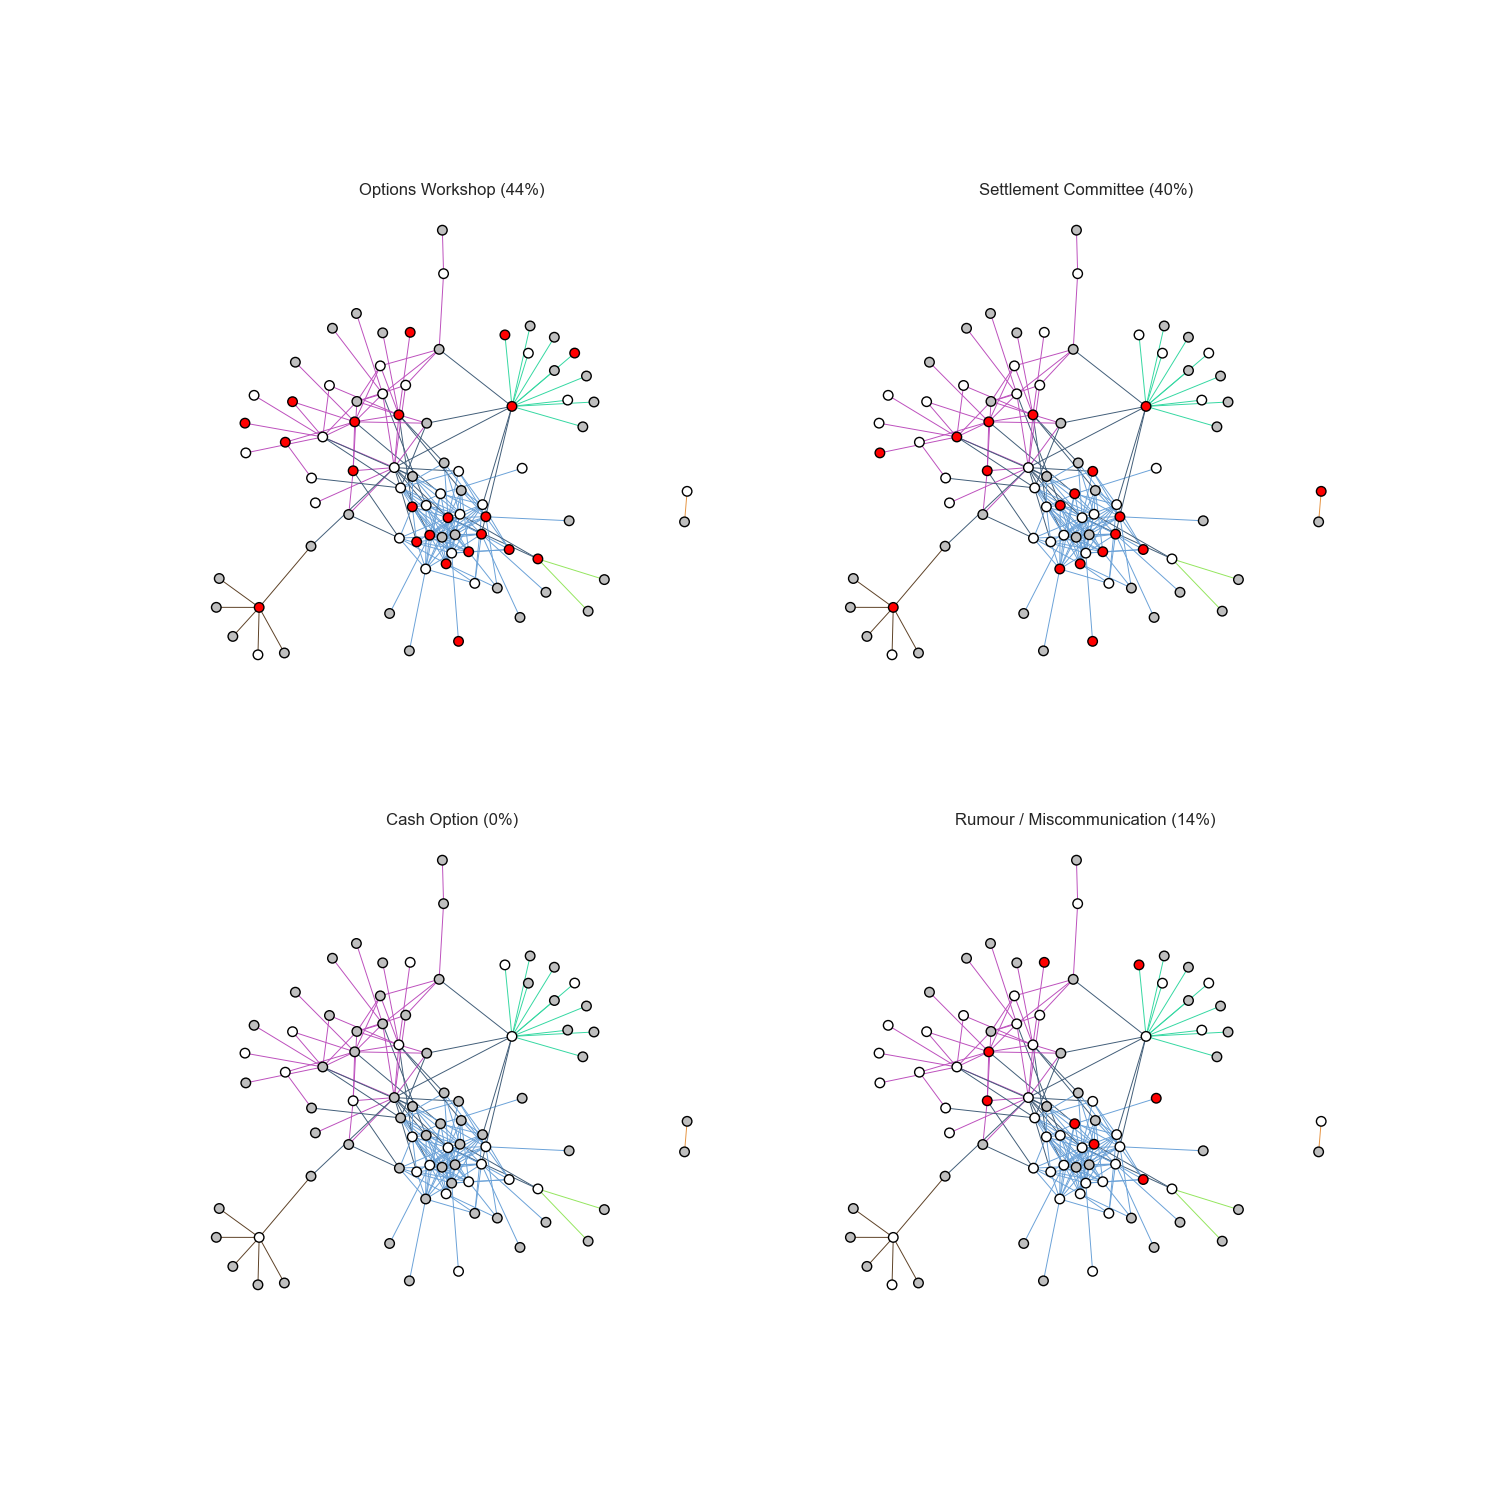

In [27]:
color_dict = { np.nan:'silver', 0: 'white', 1:  'red'}
inv_lst = ['voting', 'committee', 'cash', 'rumour']
title = ['Options Workshop (44%)', 'Settlement Committee (40%)', 'Cash Option (0%)', 'Rumour / Miscommunication (14%)']
'''
fig, axs = plt.subplots(2,2, figsize=(15,15), sharey=True)
axs = axs.ravel()
print("\n" + "--------" + "\n" + '\033[1m' + 'Participation Network:' + '\033[0m')
print("Node colour: component (na:'grey', no:'white', yes:'red') ")

for i,t,ax in zip(inv_lst, title, axs):
    ax.set(title=t, aspect=1)
    random.seed(1234)
    ig.plot(G_igu, target=ax, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', i, False, False, False, False), vertex_color=[color_dict[comp] for comp in G_igu.vs[i]], vertex_size = 0.3, edge_color=G_igu.es['hex_op'], edge_width=0.7)
#out.save(pta + "protea_participation.png")
plt.savefig(pta + "protea_participation_ld.png")
#plt.show()
'''
print("\n" + "--------" + "\n" + '\033[1m' + 'Participation Network:' + '\033[0m')
print("Group colour: communities (6)")
Image(filename=pta + "protea_participation_ld.png",  width = "600")



--------
Participation Network:
Group colour: clusters (2)


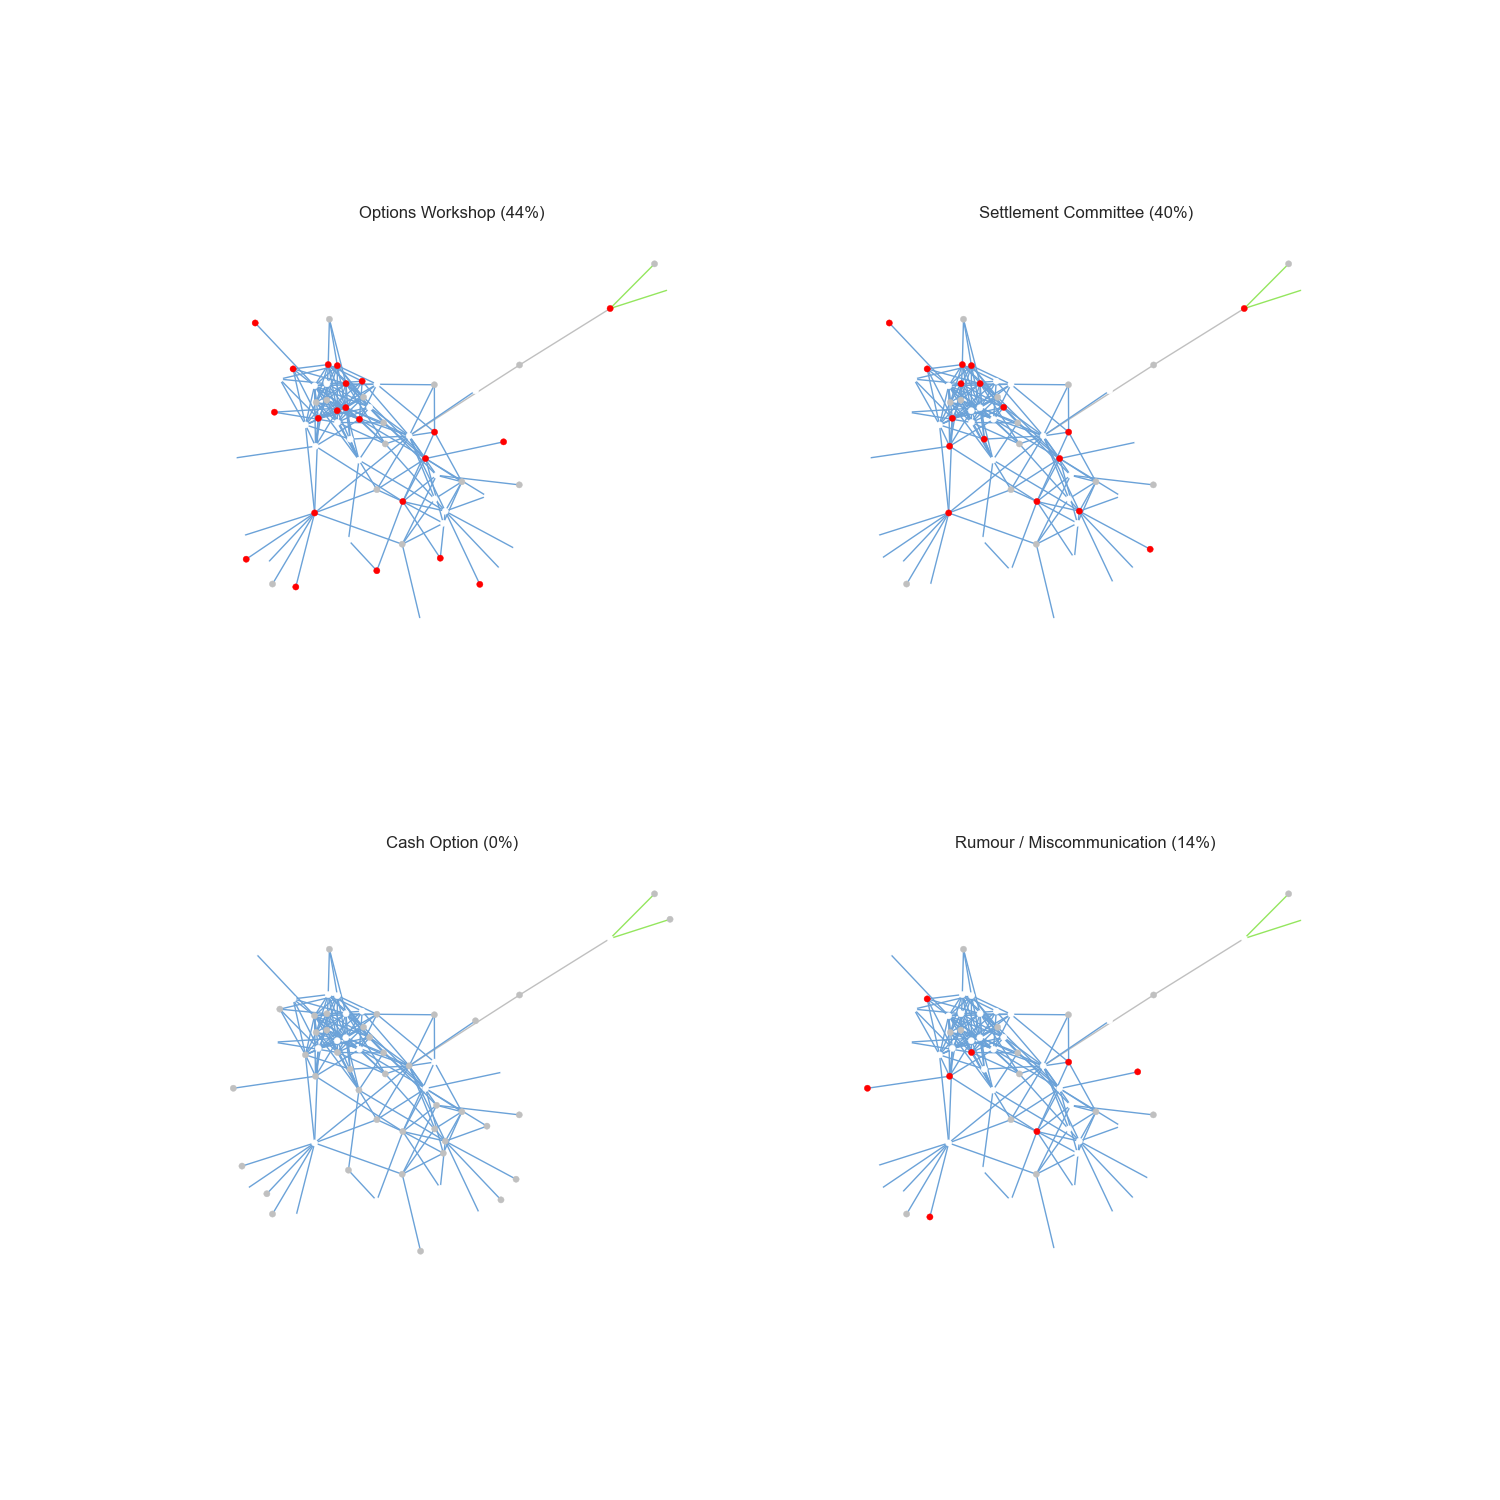

In [28]:
#print(G0.nodes.data())
k=2
color_dict = { np.nan:'silver', 0: 'white', 1:  'red'}
inv_lst = ['inoption.node', 'incommittee.node', 'cashopt.node', 'rumour.node']
title = ['Options Workshop (44%)', 'Settlement Committee (40%)', 'Cash Option (0%)', 'Rumour / Miscommunication (14%)']


node_color = [G0.nodes[v]['hex_sc'+str(k)] for v in G0.nodes]
edge_color = [('silver' if (v,w) in external else G0.edges[v,w]['hex_sc'+str(k)]) for v,w in G0.edges]
'''
#cleaning null values
for i in inv_lst:
    for v in G0.nodes:
        if i in G0.nodes[v] and np.isnan(G0.nodes[v][i]):
            G0.nodes[v][i]=np.nan

plt.rcParams["figure.figsize"]=[15,15]
coord = nx.spring_layout(G0, k=0.1,weight=None, iterations=1000)
for e,(i,t) in enumerate(zip(inv_lst, title)):
    ax = plt.subplot(220+e+1)
    plt.axis('off') 
    ax.set(title=t, aspect=1)
    random.seed(1234)
    #ig.plot(G_igu, target=ax, **set_style_2(G_igu, G_igu.layout_fruchterman_reingold(), d_lst, 'degree', i, False, False, False, False), vertex_color=[color_dict[comp] for comp in G_igu.vs[i]], vertex_size = 0.3, edge_color=G_igu.es['hex_op'], edge_width=0.7)
    random.seed(1234)
    nx.draw_networkx_nodes(G0, coord, node_size=20, node_color=[(color_dict[G0.nodes[v][i]] if i in G0.nodes[v] else 'silver') for v in G0.nodes])
    random.seed(1234)
    nx.draw_networkx_edges(G0, coord, alpha=1, edge_color=edge_color, width=1)
#out.save(pta + "protea_participation.png")
plt.savefig(pta + "protea_participation_sc.png")
#plt.show()
'''
print("\n" + "--------" + "\n" + '\033[1m' + 'Participation Network:' + '\033[0m')
print("Group colour: clusters ("+str(k)+")")
Image(filename=pta + "protea_participation_sc.png",  width = "600")


#### 5. DIFFUSION

In [29]:

import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Load Data
# CONVERT TO NETWORK X
G_nx = G_ig.to_networkx()
G_nxu = G_igu.to_networkx()
nodes = df_node.set_index('id').to_dict('index')
nx.set_node_attributes(G_nxu, nodes)
Gcc = max(nx.connected_components(G_nxu), key=len)
G_nxu_1 = G_nxu.subgraph(Gcc)
#print(G_nxu_1.nodes.data())
#--------------------------------------#

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.ICEPModel(G_nxu_1)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)
config.add_model_parameter('permeability', 0.3)

# Setting node parameters
for v in G_nxu_1.nodes():
    com = G_nxu_1.nodes[v]['community_op']
    config.add_node_configuration("com", v, com)

# Setting the edge parameters
threshold = 0.3
for e in G_nxu_1.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(10)
#print(iterations)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot(pta + "protea_diffusion_trend.png")

viz = DiffusionPrevalence(model, trends)
viz.plot(pta +"protea_diffusion_prevelance.png")

#Export
#iterations.write_snapshots()
dict_st={}
id_st={}
#print(iterations)

for it in iterations[0:7]:
    #print(it['iteration'])
    id_st = {innerKey:values for innerKey, values in it['status'].items()} 
    dict_st[it['iteration']] = id_st            
    #print(dict_st)
    col_st = ["it" + str(i) for i in range(0,7)]
df_st = pd.DataFrame(dict_st)
df_st = df_st.fillna(0)
df_st.columns = col_st
#print(df_st)

for a in range(0,6):
        if a==0:
            df_st["it0"+str(a)] = df_st["it"+str(a)]
        else:
            df_st["it0"+str(a)] = df_st["it0"+str(a-1)] + df_st["it"+str(a)]
        df_st["it0"+str(a)] = df_st["it0"+str(a)].replace(3,2)
#print(df_st)

nodes = df_st.to_dict('index')
#print(nodes)
nx.set_node_attributes(G_nxu_1, nodes)
#print(G_nxu_1.nodes.data())

no display found. Using non-interactive Agg backend


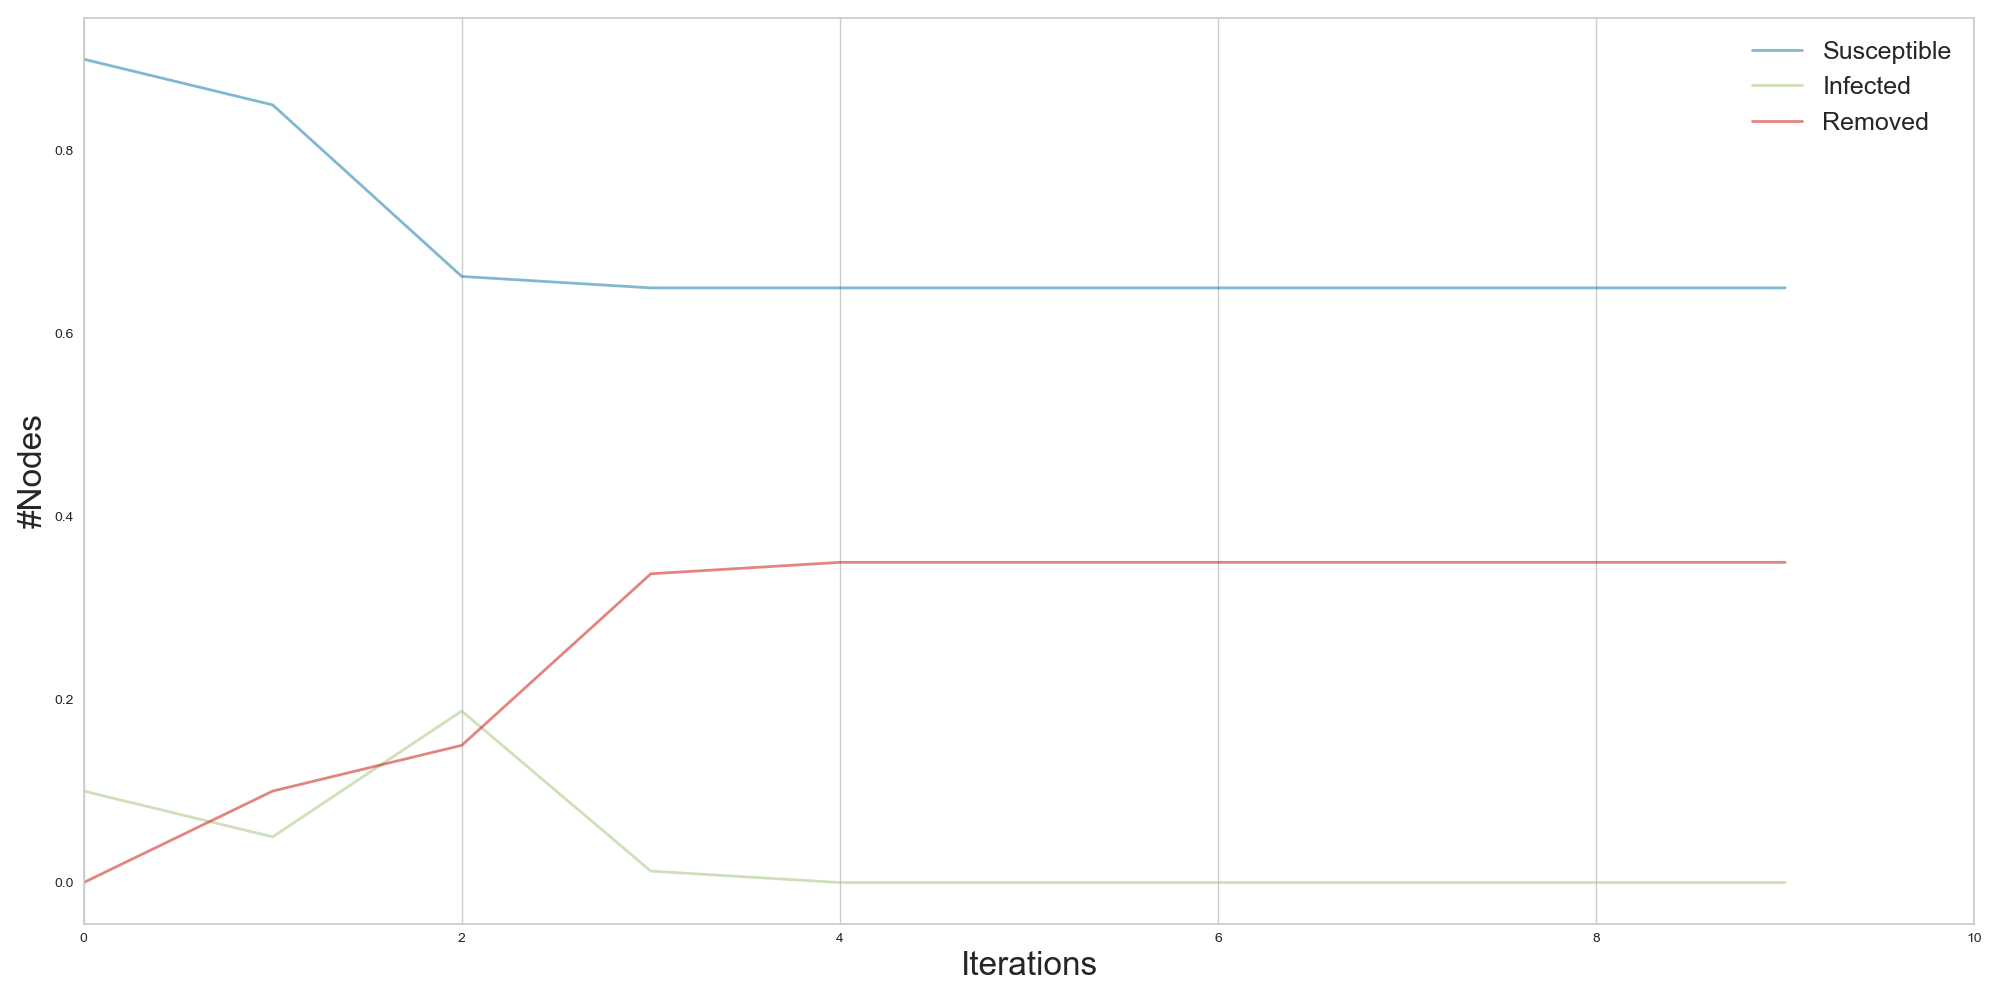

In [30]:
Image(filename=pta + "protea_diffusion_trend.png",  width = "600")

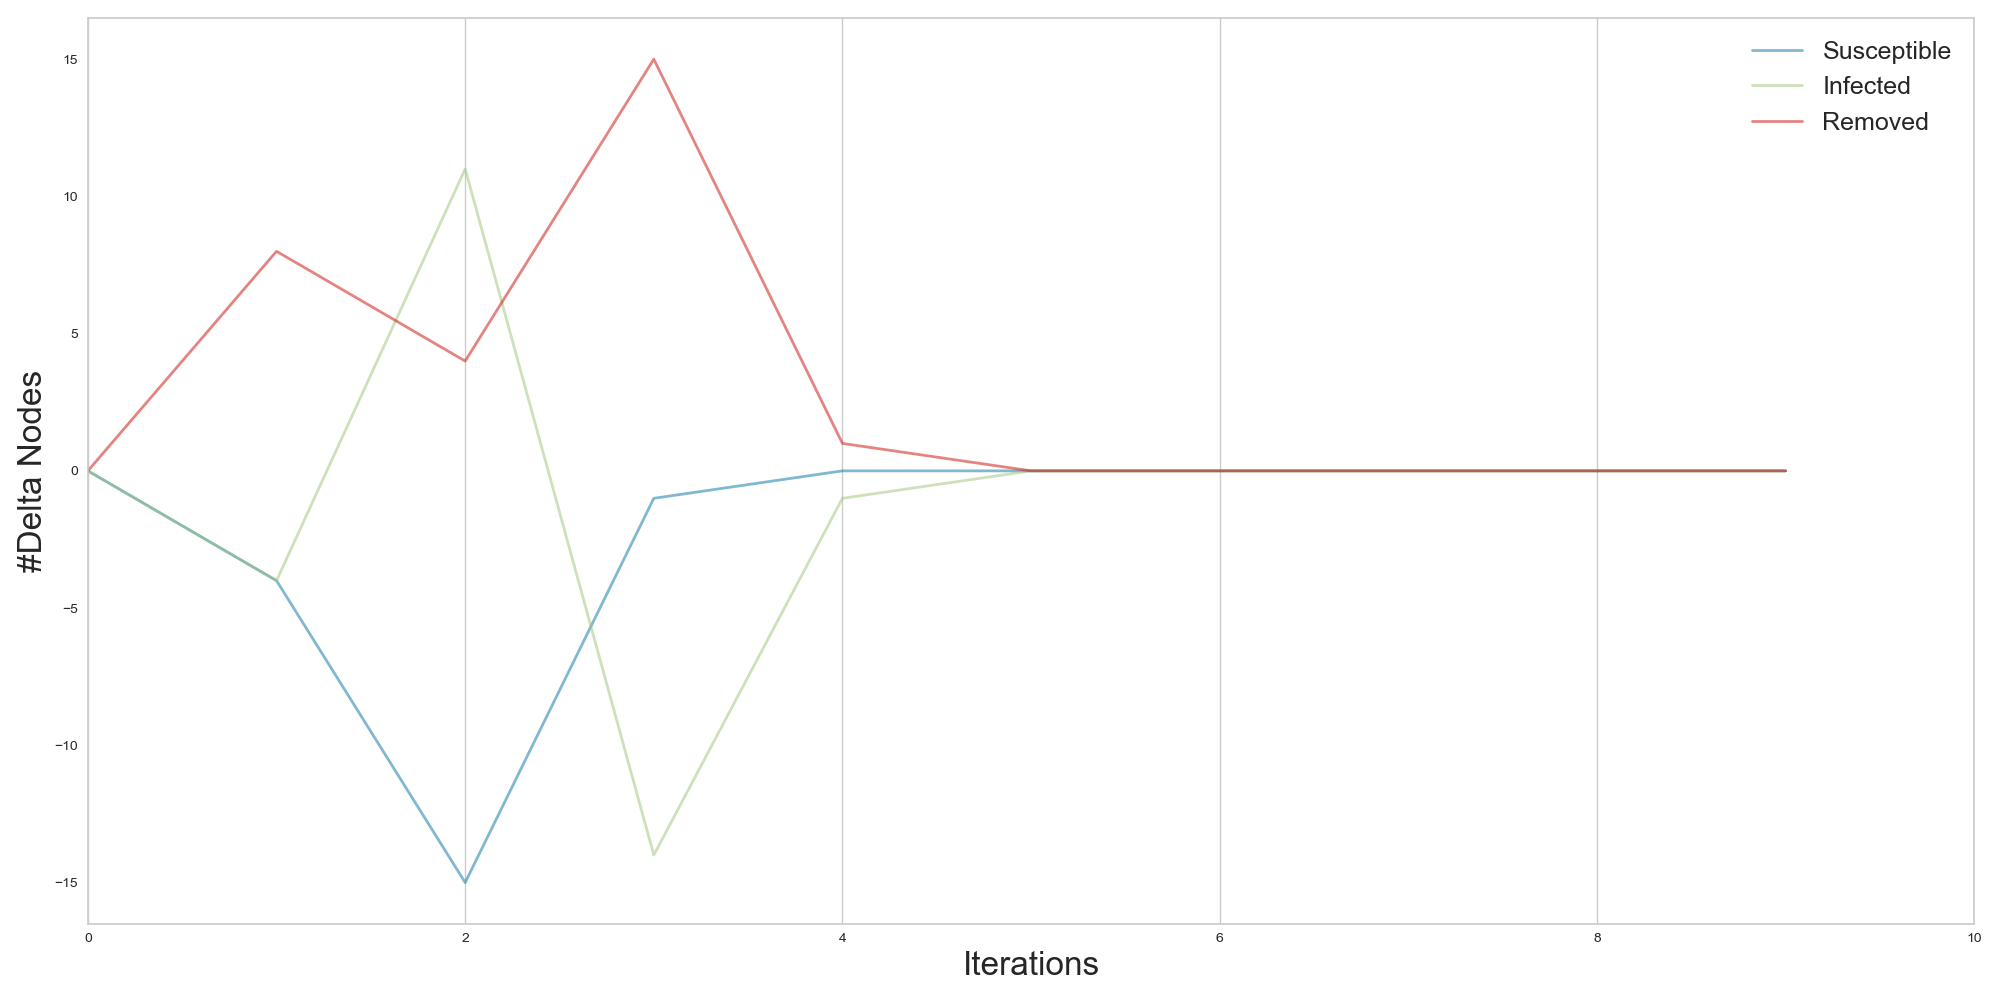

In [31]:
Image(filename=pta + "protea_diffusion_prevelance.png",  width = "600")

In [32]:
#print(G0.nodes.data())
#plt.rcParams['figure.constrained_layout_layout.use']=True
color_dict = {0: 'silver', 1: '#a31a1c', 2:  '#355e3b'}
#'#FF2400' '#32CD32'
#colours = ['#fecc5c', '#a31a1c']
plt.rcParams["figure.figsize"]=[8,10]
coord = nx.spring_layout(G_nxu_1, k=0.01,weight=None, iterations=1000)
title = ['t='+str(x) for x in range(0,6)]
for i in range(0,6):
    node_color = [color_dict[G_nxu_1.nodes[v]['it0'+str(i)]] for v in G_nxu_1.nodes]
#edge_color = [('silver' if (v,w) in external else G_nxu_1.edges[v,w]['hex_sc'+str(k)]) for v,w in G_nxu_1.edges]
    #plt.rcParams.update({'figure.figsize': (5, 5)})
    plt.clf()
    plt.axis('off')
    random.seed(1234)
    nx.draw_networkx_nodes(G_nxu_1, coord, node_size=20, node_color=node_color)
    random.seed(1234)
    nx.draw_networkx_edges(G_nxu_1, coord, alpha=1, edge_color='silver', width=1)
    #plt.tight_layout()
    #plt.title(title[i])
    #out.save(pta + "protea_participation.png")
    plt.savefig(pta + "protea_diffusion_" + str(i) + ".png")
    plt.show()
    
    




--------
Diffusion Network:
Node colour: Adopted at time t=0 (red)


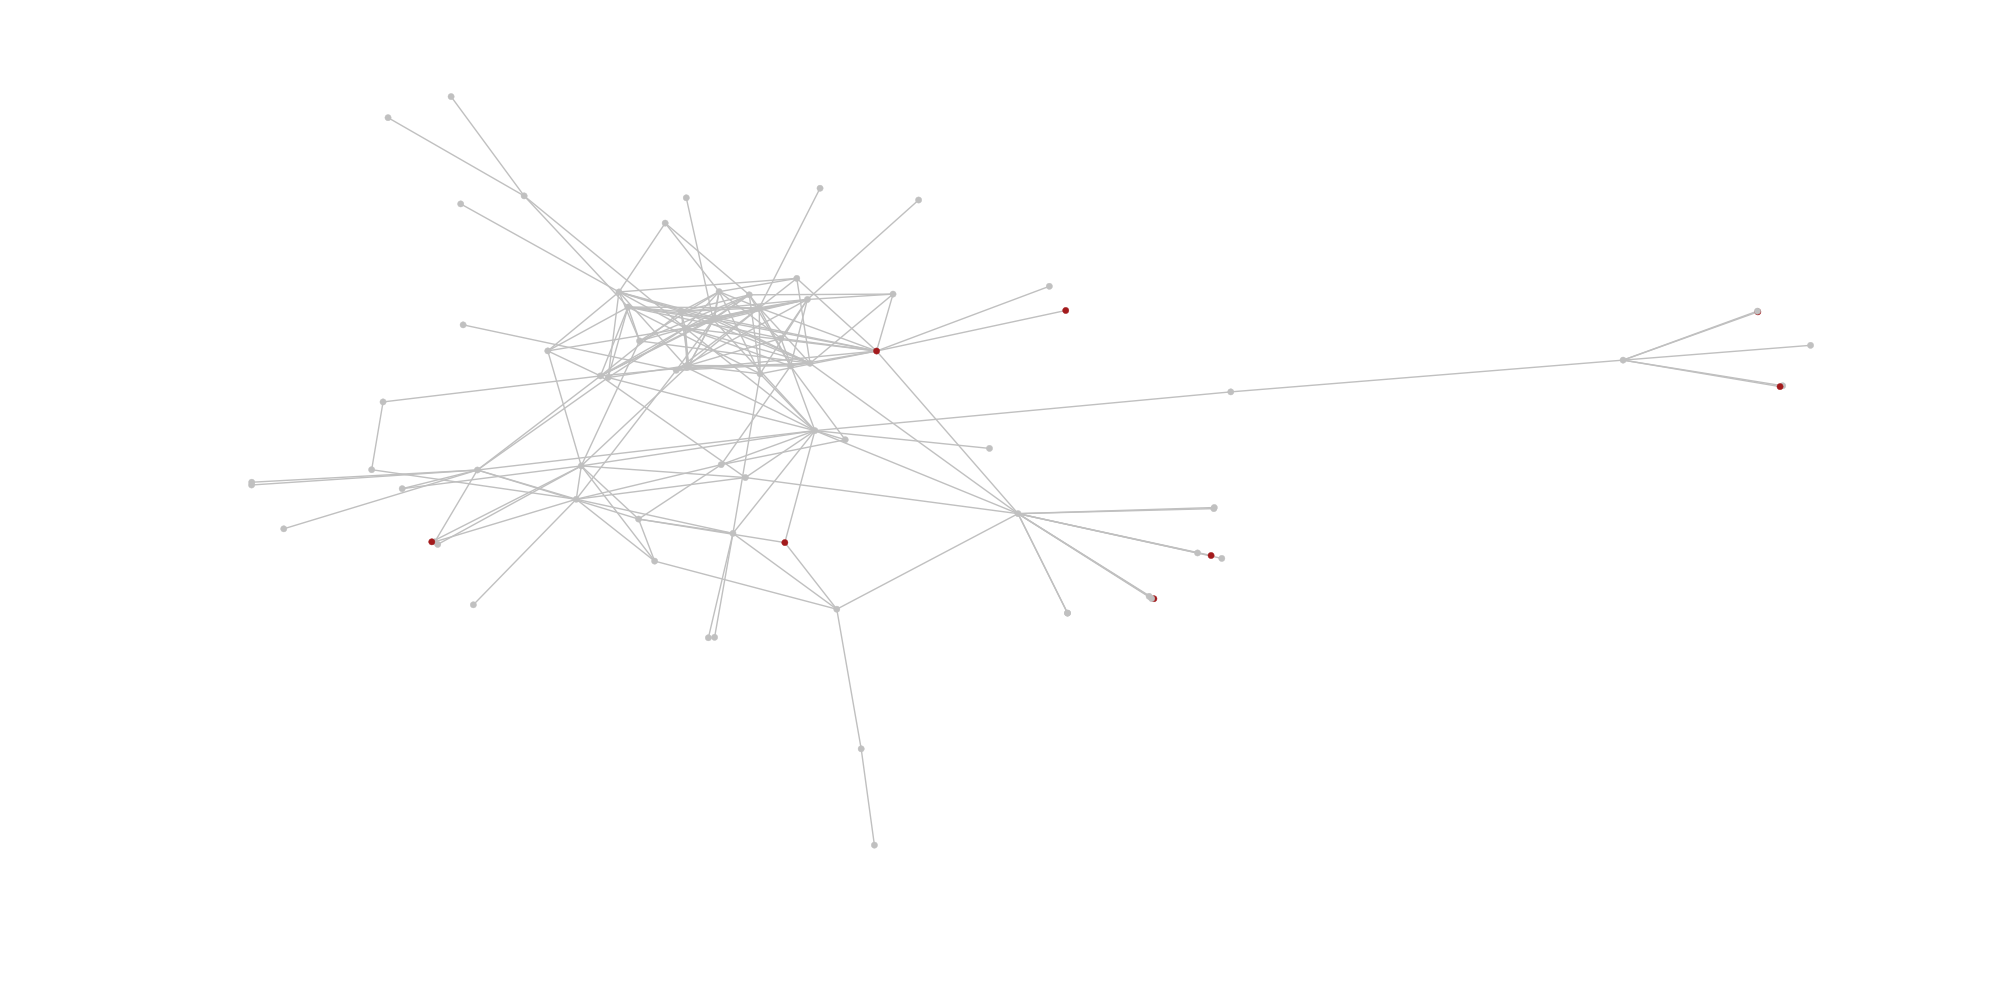

In [33]:
print("\n" + "--------" + "\n" + '\033[1m' + 'Diffusion Network:' + '\033[0m')
print("Node colour: Adopted at time t=0 (red)")
Image(filename=pta + "protea_diffusion_0.png",  width = "500")

Node colour: Adopted at time t=1 (red)


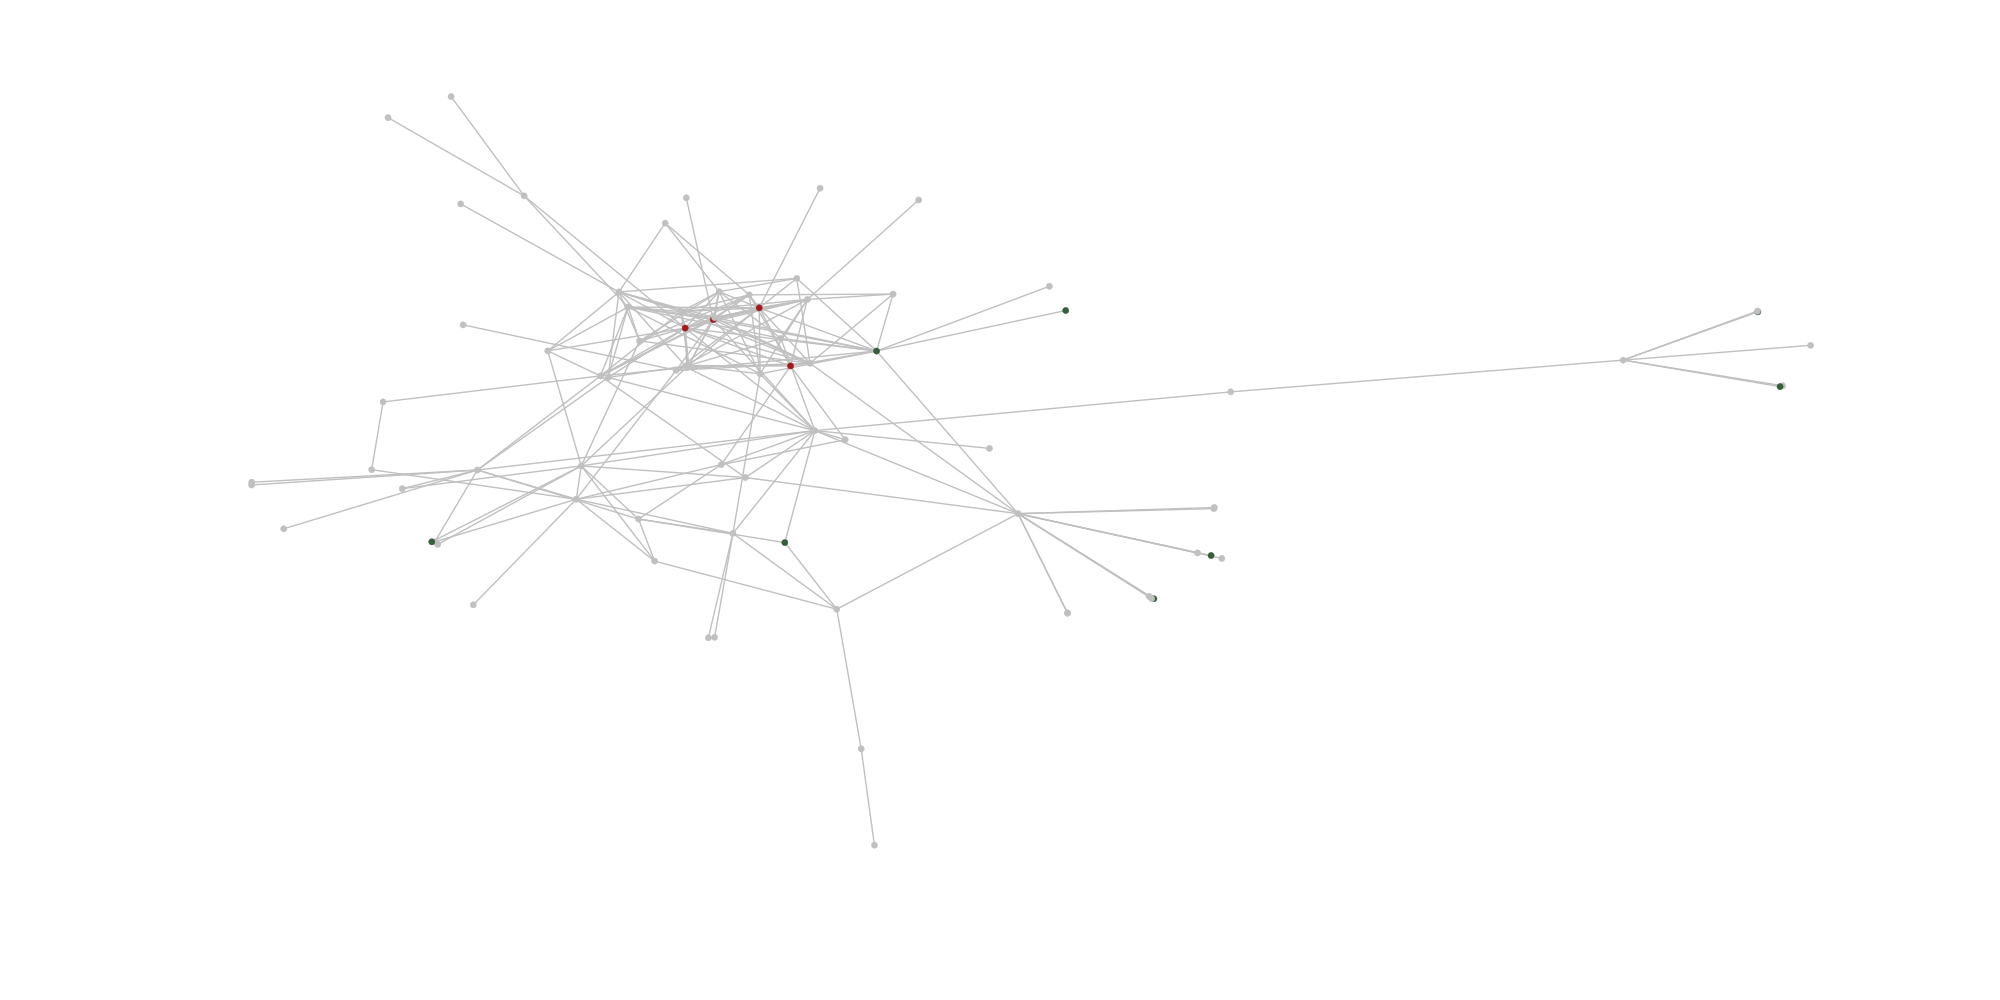

In [34]:

print("Node colour: Adopted at time t=1 (red)")
Image(filename=pta + "protea_diffusion_1.png",  width = "500")

Node colour: Adopted at time t=2 (red)


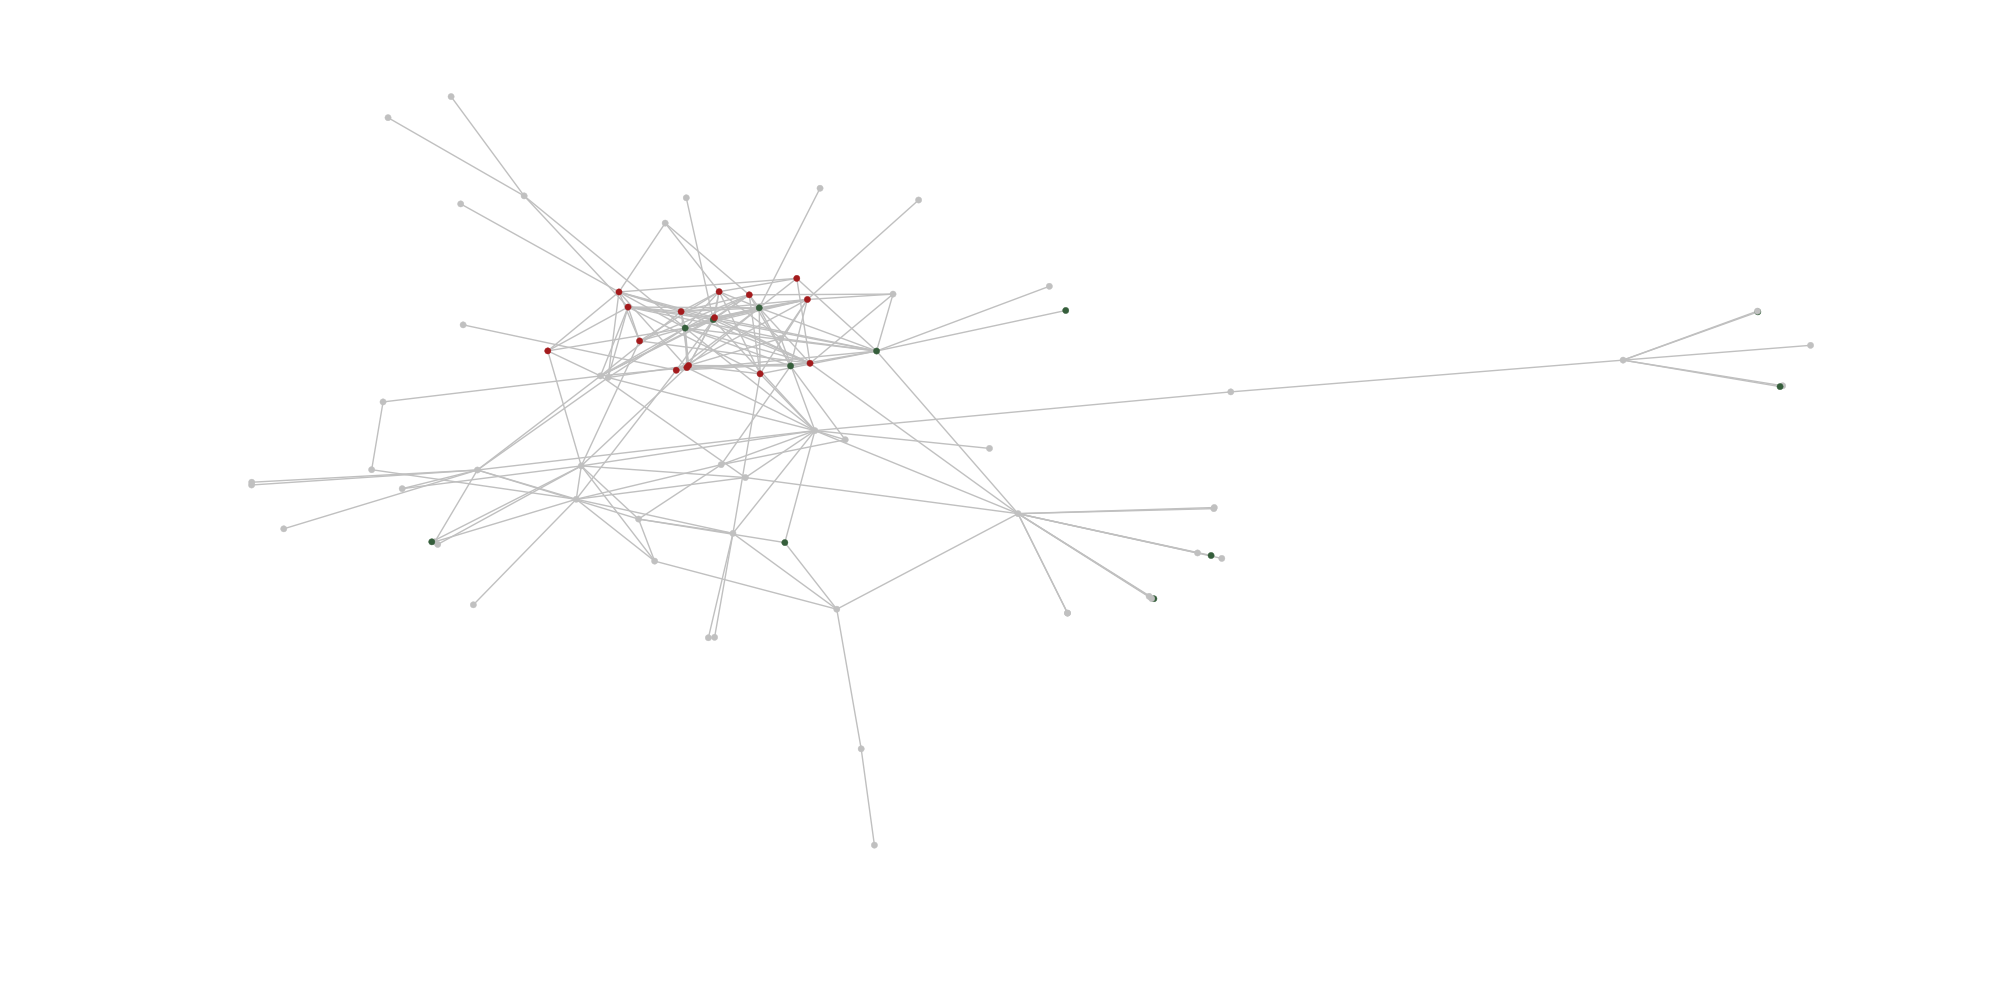

In [35]:
print("Node colour: Adopted at time t=2 (red)")
Image(filename=pta + "protea_diffusion_2.png",  width = "500")

Node colour: Adopted at time t=3 (red)


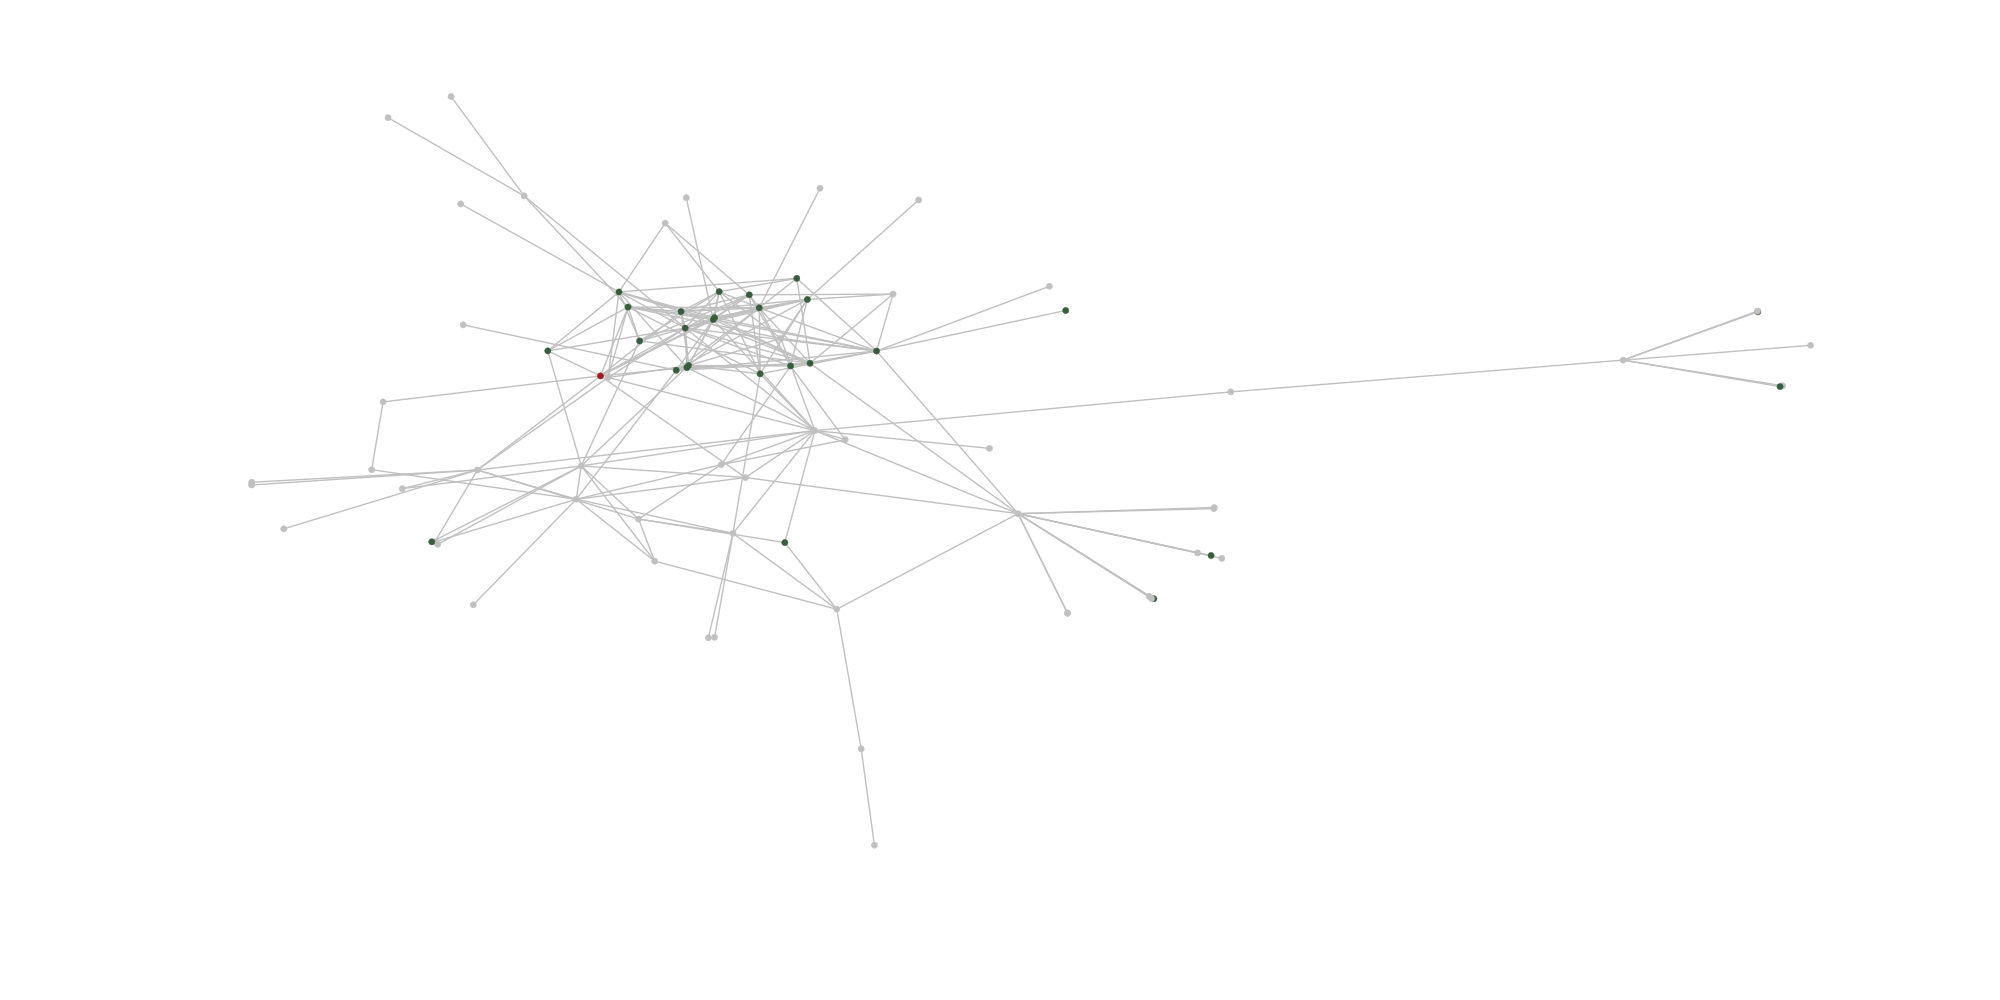

In [36]:
print("Node colour: Adopted at time t=3 (red)")
Image(filename=pta + "protea_diffusion_3.png",  width = "500")

Node colour: Adopted at time t=4 (red)


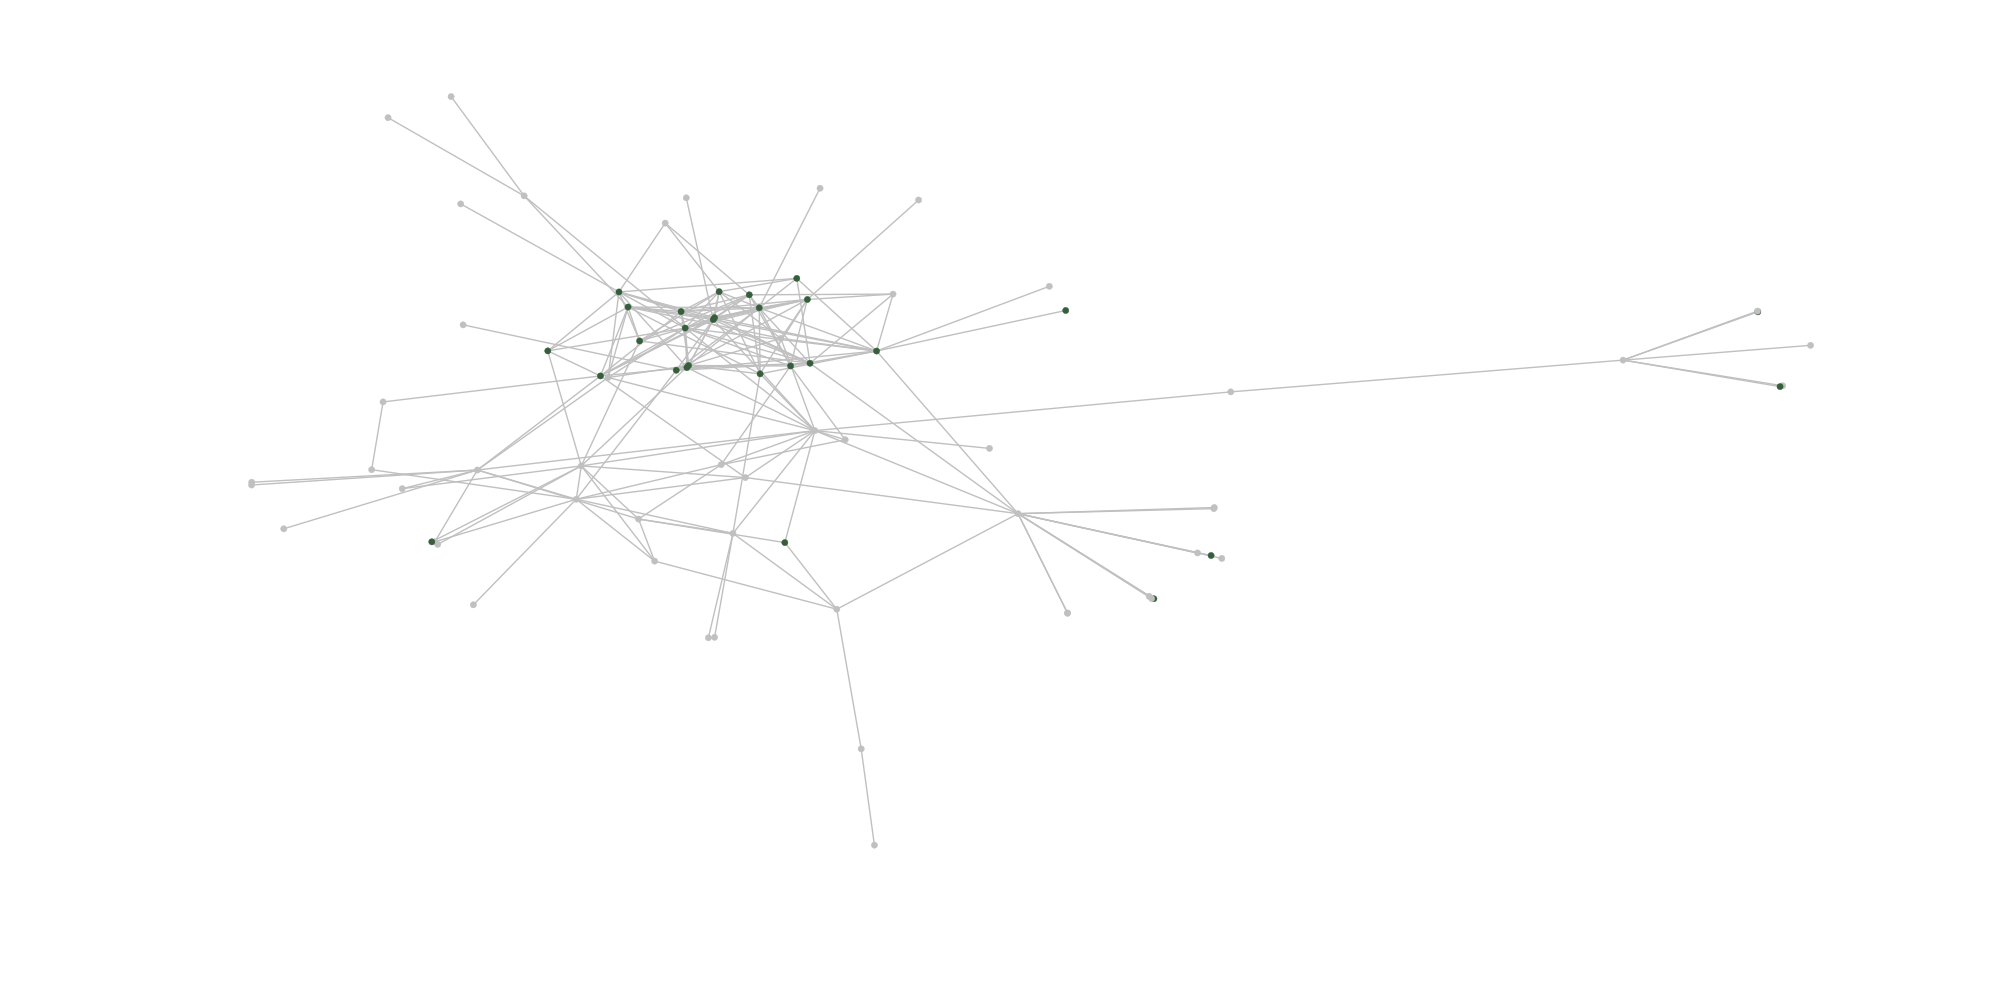

In [37]:
print("Node colour: Adopted at time t=4 (red)")
Image(filename=pta + "protea_diffusion_4.png",  width = "500")

Node colour: Adopted at time t=5 (red)


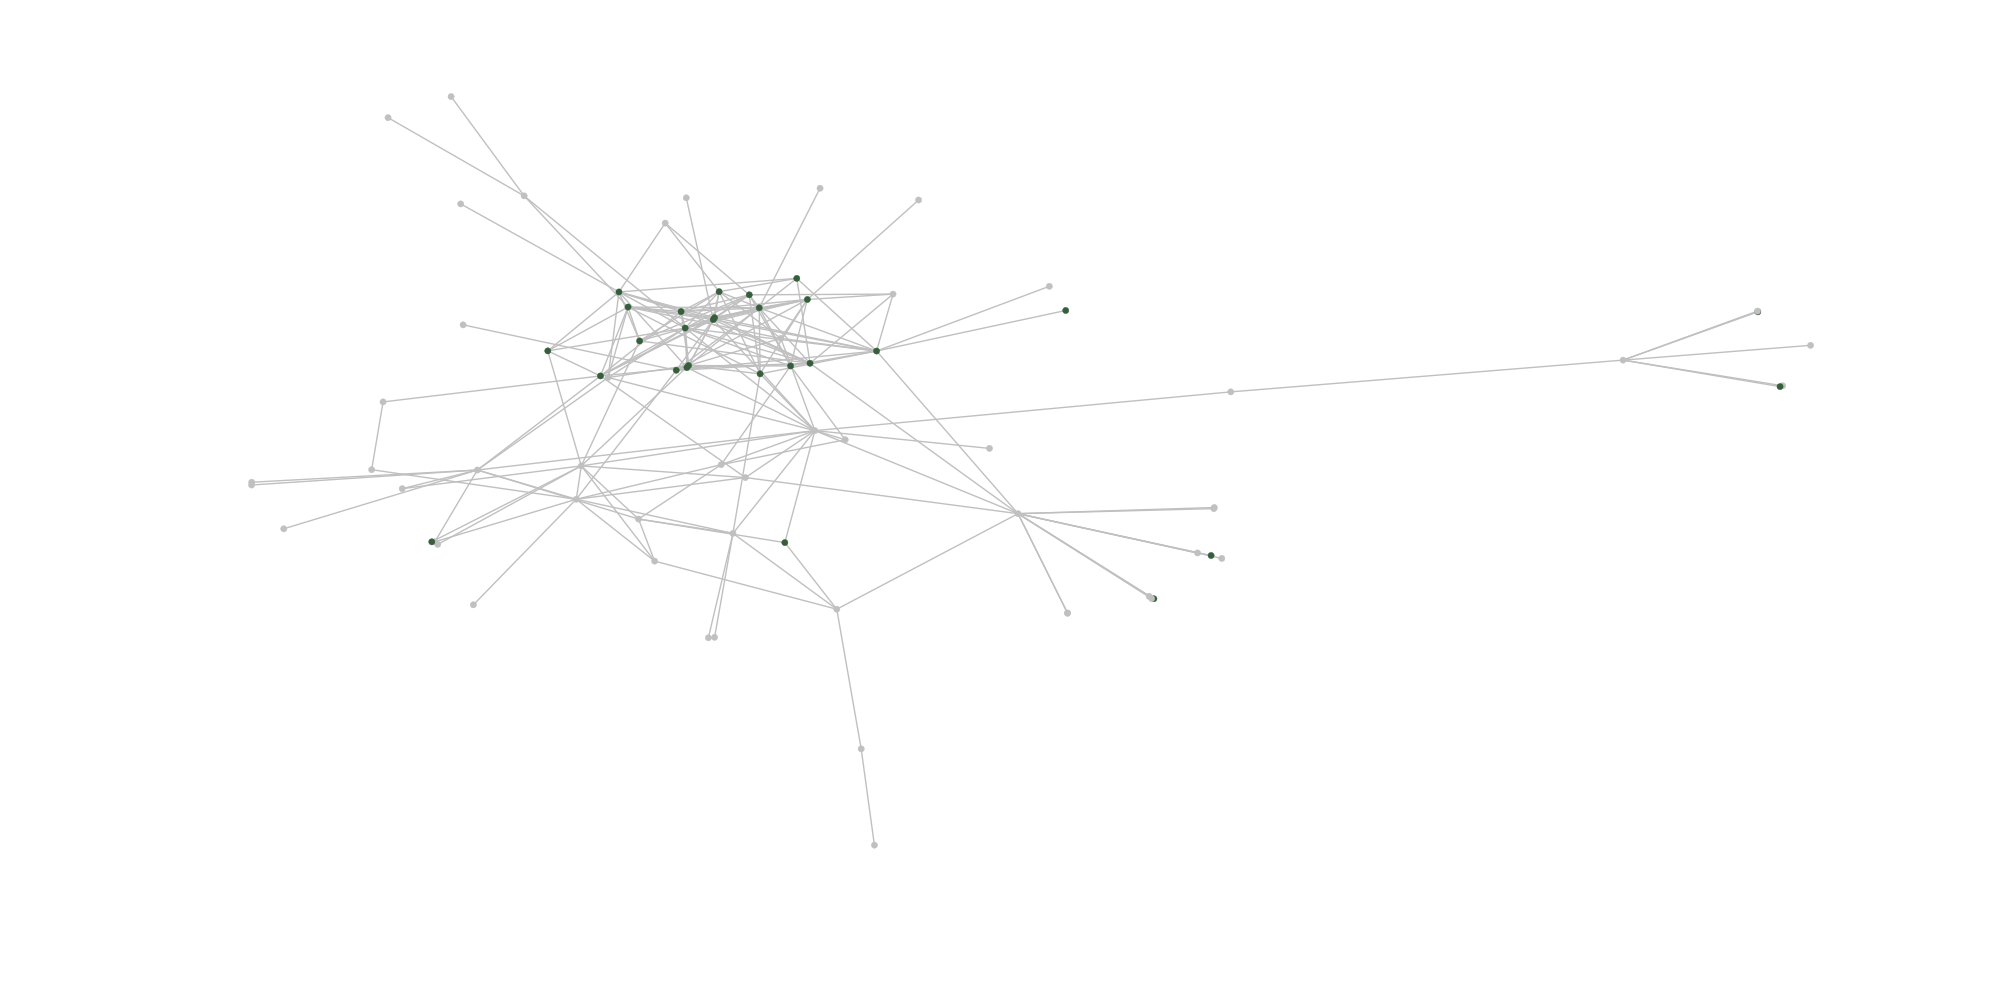

In [38]:
print("Node colour: Adopted at time t=5 (red)")
Image(filename=pta + "protea_diffusion_5.png",  width = "500")

#### 5. SUMMARY


In this section, we use group partitioning and clustering methods to identify densely connected groups and communities present in the Protea Village community network.

*Vertex partitioning* - we find 2 connected components; a k-core of 6; 132 cliques of 3 or more nodes with the largest containing 4 nodes; and 9 cohesion blocks with a 6-level hierarchy structure.

*Community detection* - we detect optimum modularity at a resolution parameter of gamma=0.6. At this level, we detect 6 communities with a modularity score of 0.42. Similarly, the greedy and louvain methods both find 6 communities with modularity score of 0.42. Though we achieve a high level of coincidence across the different methods (information scores > 0.7), the modularity scores of the detected communities register below 0.7, which shows signs of weakly partitioned groups.

*Spectral clustering* - we were able to partitition the largest connected component into 2 optimal clusters by following the elbow and silhoette approach. However, given the wide variation in cluster sizes between the 2 clusters, it is likely that the clusters are weakly partitioned.

*Restitution participation* - we were unable to identify a tendency toward homophilic ties in this community. In other words, without further analysis, it is not possible to say whether this community's participation, voting, and diffusion of information is explained by the degree of connectivity and therefore fragmentation.
